In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [46]:
data = pd.read_csv("data.csv")

In [21]:
null_stats = pd.DataFrame({
    'non_null_count': data.count(),
    'null_count': data.isna().sum(),
    'dtype': data.dtypes
})
print(null_stats)

                           non_null_count  null_count    dtype
URL                                  1781           0   object
URL_LENGTH                           1781           0    int64
NUMBER_SPECIAL_CHARACTERS            1781           0    int64
CHARSET                              1774           7   object
SERVER                               1605         176   object
CONTENT_LENGTH                        969         812  float64
WHOIS_COUNTRY                        1475         306   object
WHOIS_STATEPRO                       1419         362   object
WHOIS_REGDATE                        1654         127   object
WHOIS_UPDATED_DATE                   1642         139   object
TCP_CONVERSATION_EXCHANGE            1781           0    int64
DIST_REMOTE_TCP_PORT                 1781           0    int64
REMOTE_IPS                           1781           0    int64
APP_BYTES                            1781           0    int64
SOURCE_APP_PACKETS                   1781           0  

In [22]:
def cat(df, spec):
    table = df.pivot_table(index=spec, columns='Type', aggfunc='size', fill_value=0)

    cat = table.index
    status = table.columns
    n_cat = len(cat)
    width = 1
    space_between = 3
    x = np.arange(0, n_cat * space_between, space_between)

    fig, ax = plt.subplots(figsize=(10, 6))
    for i, stat in enumerate(status):
        ax.bar(x + i * width, table[stat], width, label=stat, color=['green' if stat == 0 else 'red'])

    ax.set_title('Вредоносность сайтов', pad=20, fontsize=14)
    ax.set_xlabel(spec, fontsize=12)
    ax.set_ylabel('Количество сайтов', fontsize=12)
    ax.set_xticks(x + width/2)
    ax.set_xticklabels(cat, fontsize=12, rotation=90)
    ax.legend(title='Статус', fontsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Добавление подписей значений
    for i, stat in enumerate(status):
        for j, value in enumerate(table[stat]):
            ax.text(x[j] + i*width, value + 0.5, str(value), 
                    ha='center', va='bottom', fontsize=11)

    plt.tight_layout()
    plt.show()

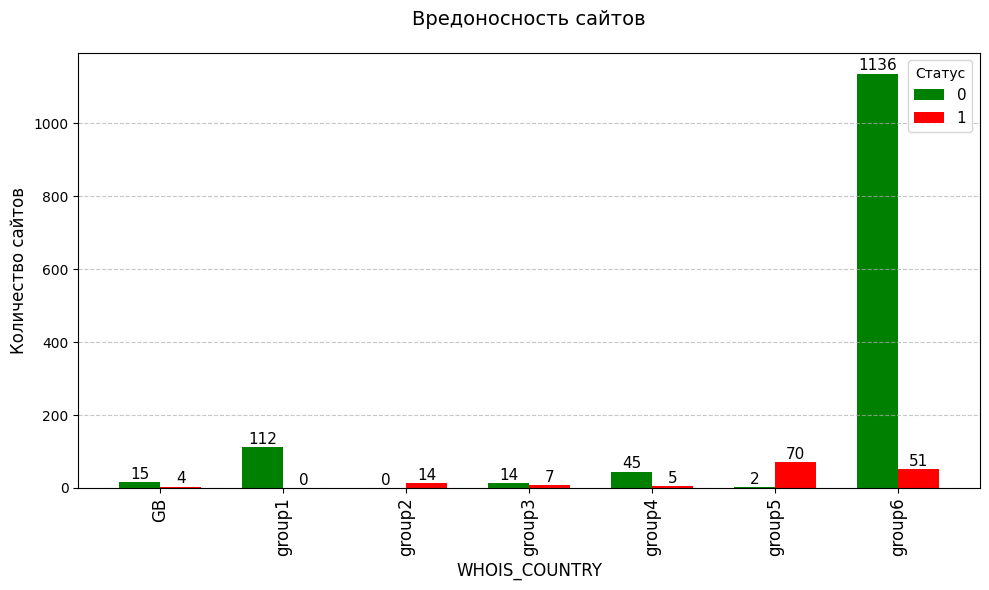

In [29]:
data['WHOIS_COUNTRY'] = data['WHOIS_COUNTRY'].replace(['AE', 'AT', 'AU', 'BE', 'BS', 'BY', 'CH', 'Cyprus', 'HK', 'IE', 'IL', 'IT', 'JP', 'KG', 'KY', 'LU', 'LV', 'NL', 'NO', 'PH', 'SC', 'SE', 'SI', 'TH', 'TR', 'United Kingdom', 'se', "[u'GB'; u'UK']"], 'group1')
data['WHOIS_COUNTRY'] = data['WHOIS_COUNTRY'].replace(['BR', 'PK', 'RU', 'UA', 'UG', 'UY', 'ru'], 'group2')
data['WHOIS_COUNTRY'] = data['WHOIS_COUNTRY'].replace(['CN', 'DE', 'KR', 'us'], 'group3')
data['WHOIS_COUNTRY'] = data['WHOIS_COUNTRY'].replace(['IN', 'PA', 'UK', 'FR'], 'group4')
data['WHOIS_COUNTRY'] = data['WHOIS_COUNTRY'].replace(['CZ', 'ES'], 'group5')
data['WHOIS_COUNTRY'] = data['WHOIS_COUNTRY'].replace(['US', 'CA'], 'group6')

cat(data, 'WHOIS_COUNTRY')

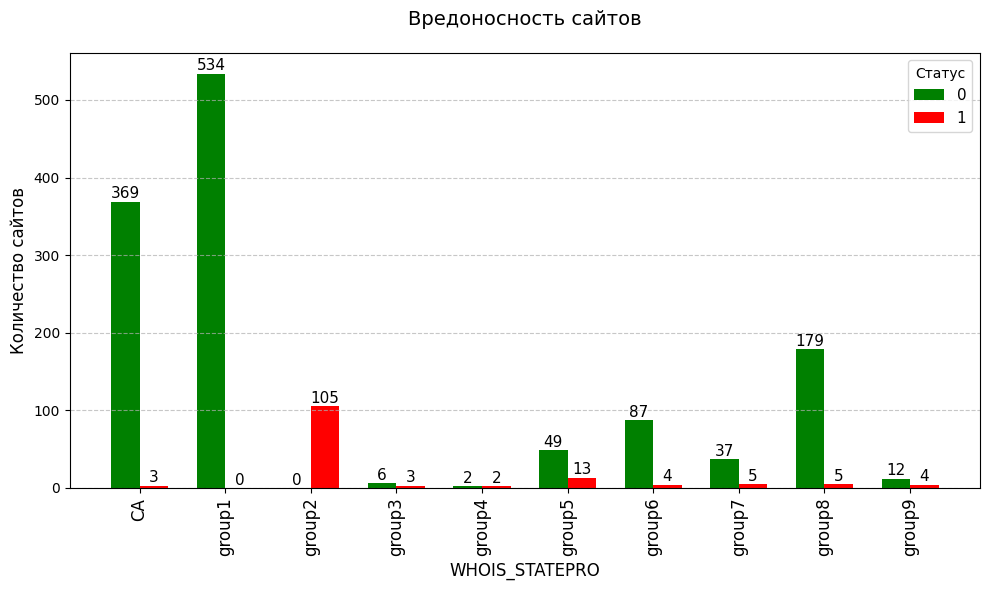

In [47]:
data['WHOIS_STATEPRO'] = data['WHOIS_STATEPRO'].replace(['-', '--', '6110021', 'AB', 'AK', 'AL', 'ALBERTA', 'ANTWERP', 'Alabama', 'Alicante', 'Andhra Pradesh', 'Arkansas', 'Austria', 'BC', 'Berlin', 'British Columbia', 'CH', 'CO. DUBLIN', 'CT', 'Central', 'Colorado', 'Connecticut', 'DC', 'DE', 'District of Columbia', 'Dubai', 'FLORIDA', 'Florida', 'Fukuoka', 'GA', 'GRAND CAYMAN', 'Greater London', 'HANTS', 'HR', 'Haryana', 'IL', 'ILOCOS NORTE R3', 'INDAL', 'Illinois', 'Indiana', 'KG', 'KS', 'Kansas', 'Karnataka', 'Kentucky', 'London', 'MAHARASHTR', 'MAINE', 'MB', 'ME', 'MH', 'MI', 'MIDDLESEX', 'MO', 'Maharashtra', 'Mahe', 'Maine', 'Manila', 'Manitoba', 'Maryland', 'Metro Manila', 'Michigan', 'Minnesota', 'Missouri', 'NC', 'NEW SOUTH WALES', 'NEW YORK', 'NH', 'NJ', 'NOT APPLICABLE', 'NSW', 'NV', 'NY', 'Nebraska', 'Nevada', 'New Jersey', 'New Mexico', 'New Providence', 'New South Wales', 'New York', 'Noord-Holland', 'North Carolina', 'Not Applicable', 'OH', 'OK', 'ONTARIO', 'OR', 'Ohio', 'Ontario', 'Oregon', 'Osaka', 'Other', 'P', 'Panama', 'Paris', 'Pennsylvania', 'Peterborough', 'QC', 'QLD', 'QUEBEC', 'Quebec', 'Queensland', 'RIX', 'RM', 'Rogaland', 'SK', 'Saskatchewan', 'South Carolina', 'TN', 'TOKYO-TO', 'TR', 'TX', 'Tennessee', 'Texas', 'Tottori', 'UK', 'UT', 'UTTAR PRADESH', 'Utr', 'VA', 'VIC', 'VT', 'Vi', 'Vic', 'Virginia', 'WEST MIDLANDS', 'WI', 'WV', 'Wisconsin', 'ZH', 'Zhejiang', 'Zug', 'ab', 'bangkok', 'bc', 'ca', 'hunansheng', 'il', 'nj', 'ny', 'qc', 'quebec', 'shandong', 'va', 'worcs'], 'group1')
data['WHOIS_STATEPRO'] = data['WHOIS_STATEPRO'].replace(['ALABAMA', 'Barcelona', 'Bei Jing', 'CALIFORNIA', 'Krasnoyarsk', 'MOSCOW', 'Montevideo', 'NONE', 'Novosibirskaya obl.', 'PRAHA', 'Punjab', 'Tamil Nadu', 'VERMONT', 'Utah', 'WC1N', 'kireka', 'liaoningsheng', 'widestep@mail.ru'], 'group2')
data['WHOIS_STATEPRO'] = data['WHOIS_STATEPRO'].replace(['MD', 'Massachusetts', 'UTAH'], 'group3')
data['WHOIS_STATEPRO'] = data['WHOIS_STATEPRO'].replace(['TEXAS', 'beijingshi'], 'group4')
data['WHOIS_STATEPRO'] = data['WHOIS_STATEPRO'].replace(['LA', 'California'], 'group5')
data['WHOIS_STATEPRO'] = data['WHOIS_STATEPRO'].replace(['CO', 'ON', 'MA'], 'group6')
data['WHOIS_STATEPRO'] = data['WHOIS_STATEPRO'].replace(['PA', 'PANAMA'], 'group7')
data['WHOIS_STATEPRO'] = data['WHOIS_STATEPRO'].replace(['Arizona', 'FL', 'WA'], 'group8')
data['WHOIS_STATEPRO'] = data['WHOIS_STATEPRO'].replace(['AZ', 'Washington'], 'group9')

cat(data, 'WHOIS_STATEPRO')

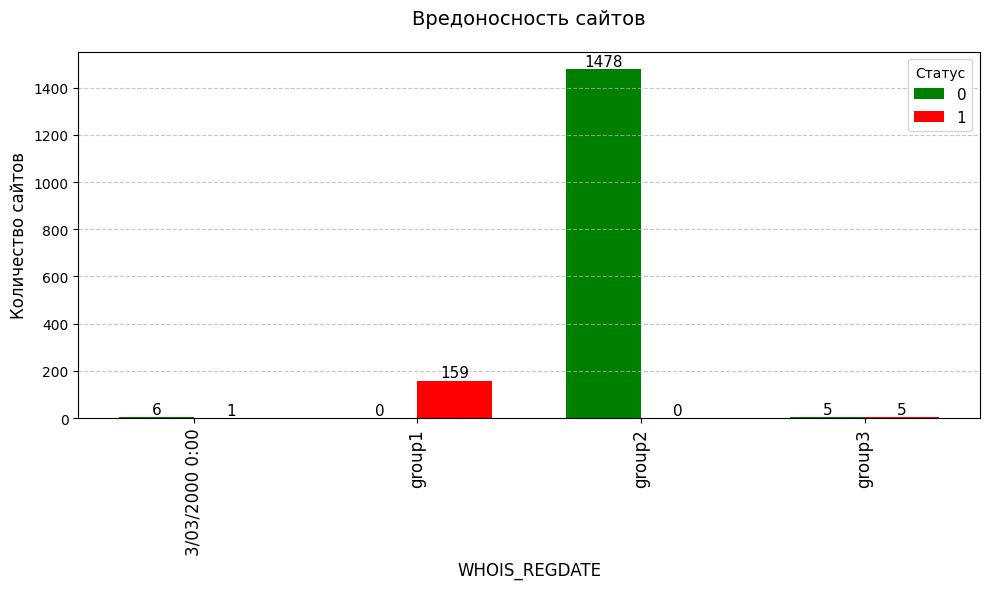

In [26]:
data['WHOIS_REGDATE'] = data['WHOIS_REGDATE'].replace(['24/05/2000 0:00', '16/02/2005 0:00', '18/06/2003 0:00', '8/11/2014 7:41', '26/04/2004 0:00', '9/04/2002 0:00', '7/10/2006 0:00', '9/02/2007 0:00', '9/10/2016 17:08', '9/03/2004 0:00', '14/08/2008 0:00', '8/06/2009 3:48', '20/08/2014 0:00', '30/03/2011 0:00', '3/08/2004 0:00', '9/03/2000 17:50', '19/07/2004 0:00', '17/12/2005 0:00', '9/02/2009 0:00', '18/07/2005 0:00', '8/03/2003 0:00', '11/01/1999 0:00', '14/03/2004 0:00', '7/04/2002 20:00', '14/09/2009 8:39', '24/10/2007 0:00', '21/10/2004 0:00', '23/06/2003 0:00', '6/05/2006 0:00', '17/09/2008 0:00', '10/10/2015 18:21', '19/01/2015 0:00', '0', '18/12/2004 0:00', '6/10/2005 0:00', '12/10/1997 4:00', '28/08/2003 0:00', '1/03/2005 0:00', '9/02/2000 14:17', '10/09/2003 0:00', '12/03/2009 21:00', '9/10/2014 0:00', '30/05/2008 0:00', '2/01/2016 0:00', '22/08/2010 0:00', '16/07/2000 0:00', '5/03/2013 20:51', '3/01/2002 0:00', '21/09/2009 0:00', '22/03/2009 0:00', '27/09/2013 0:00', '8/06/2007 0:00', '25/05/2013 0:00', '16/11/2016 0:00', '4/11/2016 0:00'], 'group1')
data['WHOIS_REGDATE'] = data['WHOIS_REGDATE'].replace(['17/02/2009 0:00', '6/09/2005 0:00', '6/08/2002 0:00', '20/04/2001 0:00', '6/11/1997 0:00', '2/11/1996 0:00', '15/04/2010 0:00', '16/07/2016 0:00', '22/02/2007 0:00', '9/08/1999 0:00', '26/01/2006 21:09', '27/09/2000 0:00', '3/03/1999 0:00', '22/02/2001 0:00', '28/12/1998 0:00', '22/06/1998 0:00', '23/04/1996 0:00', '22/11/2000 0:00', '29/07/2004 0:00', '31/10/2008 0:00', '10/05/2002 0:00', '17/02/1999 5:00', '7/10/2005 16:25', '24/09/2009 0:00', '28/09/2005 0:00', '23/05/1995 0:00', '27/08/2002 0:00', '9/03/2007 0:00', '13/06/1995 0:00', '7/10/1997 4:00', '30/08/2015 0:00', '22/07/2004 0:00', '17/03/2006 0:00', '21/06/2004 6:33', '30/10/2002 0:00', '20/07/2006 0:00', '8/02/2005 0:00', '18/01/2008 0:00', '22/05/1995 0:00', '4/01/2001 0:00', '11/11/1996 0:00', '13/07/2008 0:00', '17/08/2010 0:00', '17/08/1995 0:00', '9/04/2011 16:13', '28/06/2011 0:00', '25/08/2004 0:00', '13/04/1994 0:00', '21/10/2006 0:00', '16/09/1996 0:00', '16/01/2008 0:00', '7/04/2003 0:00', '10/07/2002 0:00', '28/10/1999 0:00', '12/11/2007 20:49', '29/03/1994 0:00', '26/09/2005 0:00', '9/04/2008 0:00', '9/01/2007 0:00', '8/11/1998 0:00', '27/06/2001 0:00', '8/04/2009 0:00', '8/12/2006 0:00', '2/09/2003 0:00', '3/01/2009 0:00', '23/07/2011 0:00', '14/09/2000 8:47', '30/12/1999 0:00', '11/10/2005 0:00', '21/03/2014 0:00', '15/06/2007 0:00', '23/03/1998 0:00', '11/10/2000 0:00', '21/01/2008 0:00', '18/01/1996 5:00', '22/08/1996 0:00', '20/03/2002 0:00', '24/10/1996 0:00', '9/02/2001 0:00', '7/08/1995 0:00', '5/12/1996 5:00', '19/04/2006 0:00', '15/12/1998 0:00', '3/06/2000 0:00', '15/09/1997 0:00', '20/07/1998 4:00', '21/05/2007 21:12', '26/11/1996 0:00', '28/06/2006 0:00', '17/05/2008 0:00', '7/04/2011 0:00', '11/01/2005 0:00', '18/05/2005 19:41', '25/05/2000 0:00', '31/08/2003 0:00', '14/07/2011 0:00', '16/11/1999 0:00', '9/12/2008 0:00', '10/06/1999 0:00', '1/05/2002 0:00', '4/12/2014 0:00', '22/03/2005 3:36', '19/12/1997 0:00', '6/08/2004 0:00', '21/09/2001 0:00', '27/06/2004 0:00', '15/05/2005 0:00', '19/05/2016 0:00', '2/12/1997 0:00', '30/07/2009 4:01', '17/05/2007 0:00', '28/07/1999 0:00', '29/03/1997 0:00', '10/02/2000 0:00', '17/09/1998 0:00', '14/12/2004 0:00', '27/04/2016 0:00', '3/08/1998 0:00', '19/12/2007 0:00', '5/06/2003 0:00', '14/10/2001 0:00', '3/09/1996 0:00', '26/05/1998 0:00', '21/06/1997 0:00', '13/08/2004 0:00', '9/02/2005 0:00', '16/07/1998 0:00', '10/03/2005 0:00', '12/12/1990 0:00', '28/04/2003 0:00', '27/01/1995 0:00', '28/10/2008 0:00', '27/03/1998 0:00', '13/02/2002 19:55', '7/12/2006 0:00', '6/10/1999 0:00', '4/03/1996 0:00', '28/07/2007 0:00', '28/01/2006 0:00', '22/09/2002 0:00', '13/07/2001 0:00', '7/04/2007 0:00', '2/12/2000 0:00', '16/05/2001 0:00', '30/07/2004 0:00', '3/05/2015 0:00', '26/05/1997 0:00', '22/02/1996 0:00', '3/07/2000 17:33', '29/09/1994 0:00', '15/12/2007 0:00', '22/04/1999 0:00', '5/10/2006 0:00', '8/09/2003 0:00', '13/09/2001 23:03', '4/06/2009 0:00', '25/11/1995 0:00', '12/08/2005 0:00', '22/10/1998 0:00', '2/10/2007 0:00', '28/08/2001 0:00', '29/07/1998 4:00', '26/04/2001 0:00', '4/03/2004 0:00', '8/04/1996 0:00', '27/05/2010 0:00', '18/12/2008 0:00', '1/07/2015 0:00', '27/01/2011 0:00', '25/06/2002 0:00', '2/05/1996 0:00', '15/12/2010 0:00', '12/03/2008 0:00', '9/03/2010 0:00', '11/10/2002 0:00', '13/05/1998 0:00', '24/11/2001 0:00', '16/07/1998 16:08', '18/01/1994 0:00', '27/06/2015 0:00', '7/08/1996 0:00', '20/12/1999 0:00', '20/09/1995 0:00', '22/08/2003 0:00', '16/07/1999 0:00', '19/02/1997 0:00', '15/04/2004 0:00', '18/12/2006 0:00', '21/12/2005 0:00', '31/07/2000 0:00', '1/02/2003 16:44', '8/02/2013 0:00', '27/09/2010 0:00', '1/02/1994 0:00', '30/03/1994 0:00', '30/01/1996 0:00', '19/07/2010 20:03', '29/07/2002 0:00', '15/12/2004 0:00', '9/09/2002 0:00', '27/01/2010 0:00', '16/02/2010 0:00', '22/03/1999 0:00', '31/07/1997 0:00', '2/04/1999 0:00', '19/05/2003 0:00', '27/04/2007 0:00', '17/05/2001 0:00', '31/12/1999 0:00', '16/01/2001 0:00', '29/07/2006 0:00', '7/03/2001 0:00', '20/02/2006 0:00', '30/07/2002 0:00', '22/06/2014 0:00', '16/08/1999 0:00', '9/12/2003 0:00', '26/05/2006 0:00', '2/06/2004 0:00', '26/07/2005 0:00', '1/04/2008 22:47', '28/03/2006 0:00', '4/01/1995 0:00', '12/11/2016 0:00', '9/08/2002 18:13', '15/08/1995 0:00', '18/04/1995 0:00', '7/02/2006 0:00', '20/05/1996 0:00', '25/03/2010 0:00', '12/09/2009 21:54', '20/01/1995 0:00', '5/12/1996 0:00', '9/08/1995 0:00', '26/01/2001 12:11', '24/05/2001 20:47', '17/04/1996 0:00', '8/09/2004 0:00', '9/01/1998 0:00', '18/04/2001 0:00', '24/10/1999 0:00', '30/08/2004 0:00', '7/07/1997 0:00', '31/01/1995 5:00', '30/10/2003 0:00', '5/02/2009 0:00', '3/12/1999 0:00', '25/10/2003 0:00', '3/04/2011 0:00', '18/10/2005 0:00', '21/05/1995 0:00', '22/01/2006 0:00', '28/04/2005 0:00', '19/10/2005 0:00', '16/03/2003 8:22', '6/03/1998 0:00', '10/03/1998 0:00', '8/05/2001 0:00', '10/05/2000 0:00', '10/03/2006 0:00', '31/05/2005 0:00', '25/06/1997 0:00', '20/04/1995 4:00', '6/08/1995 0:00', '20/03/2005 0:00', '13/01/2001 0:12', '25/09/2003 0:00', '27/05/2006 0:00', '3/05/2006 0:00', '13/10/2000 0:00', '23/11/1998 0:00', '9/08/2009 0:00', '1/07/2007 5:40', '4/10/2003 0:00', '16/11/1998 0:00', '5/02/1999 0:00', '10/01/1998 0:00', 'b', '18/01/1995 0:00', '22/08/2007 0:00', '8/04/1998 0:00', '30/04/2016 0:00', '16/06/2014 0:00', '22/05/2009 0:00', '12/08/2008 22:10', '12/02/1999 0:00', '16/08/2016 0:00', '30/05/2003 0:00', '26/03/2002 0:00', '27/06/1996 0:00', '15/04/1999 0:00', '16/12/1993 5:00', '6/11/2001 1:42', '27/04/2009 0:00', '11/11/2007 0:00', '18/10/2004 0:00', '6/09/1997 0:00', '21/11/1997 0:00', '29/01/2003 23:45', '10/01/2002 0:57', '1/09/1998 0:00', '14/09/2007 0:00', '11/11/2000 0:00', '2/01/2001 0:00', '22/11/1996 0:00', '28/03/2000 0:00', '13/09/2000 0:00', '6/05/2010 16:44', '28/11/2006 0:00', '16/02/2001 9:00', '19/11/1998 0:00', '3/08/1999 0:00', '22/11/2003 0:00', '22/03/2017 0:00', '9/06/2010 0:00', '1/03/1994 0:00', '1/06/2006 0:00', '16/05/1995 0:00', '29/09/2015 0:00', '5/11/2007 0:00', '23/06/2006 0:00', '4/09/2004 0:00', '10/05/2006 20:00', '30/07/1996 0:00', '19/10/2006 0:00', '25/10/2002 0:00', '3/09/1996 4:00', '28/12/2007 0:00', '12/10/2003 0:00', '20/10/1998 0:00', '3/06/1998 0:00', '26/07/1990 0:00', '3/06/1997 0:00', '8/07/1996 0:00', '4/08/1995 0:00', '25/02/2005 0:00', '12/02/2002 0:00', '28/09/2007 16:06', '11/11/2015 0:00', '15/04/2002 0:00', '7/11/1996 0:00', '7/09/1995 0:00', '28/12/1999 0:00', '2/11/2010 21:52', '4/10/1996 0:00', '21/02/1992 0:00', '26/01/2007 0:00', '9/08/1994 0:00', '5/11/2003 0:00', '5/03/2005 0:00', '2/02/1996 0:00', '3/07/2002 0:00', '14/12/2009 0:00', '14/12/1995 5:00', '13/02/2017 0:00', '21/01/2007 22:31', '2/10/2000 0:00', '5/10/2005 0:00', '17/10/2008 0:00', '10/05/2006 23:10', '26/01/2001 0:00', '12/03/2009 1:58', '4/02/2003 0:00', '6/07/2016 14:30', '1/07/1998 0:00', '29/09/1998 0:00', '4/01/2007 0:00', '20/11/2007 0:00', '25/10/2005 0:00', '14/04/2017 0:00', '11/11/2006 0:00', '4/01/1997 0:00', '8/02/2000 0:00', '13/11/2003 0:00', '13/12/1995 0:00', '15/04/2003 0:00', '2/10/2002 0:00', '11/02/1997 0:00', '17/02/2006 0:00', '12/06/2001 20:58', '25/07/1995 0:00', '24/06/2003 0:00', '29/05/1996 0:00', '4/04/2006 0:00', '19/02/2002 1:02', '23/09/2009 0:00', '17/07/2000 0:00', '15/03/2005 0:00', '27/07/2003 0:00', '13/07/1998 0:00', '5/03/1994 0:00', '23/10/2008 0:00', '24/04/2009 0:00', '22/03/2006 0:00', '8/12/2016 0:00', '19/12/1995 0:00', '8/06/2006 0:00', '4/10/2010 0:00', '14/09/2006 0:00', '1/05/2009 0:00', '5/05/2004 0:00', '23/10/1994 0:00', '8/12/2007 0:00', '7/03/1996 0:00', '5/11/2008 0:00', '26/07/2003 0:00', '4/07/2007 0:00', '6/03/1996 5:00', '18/10/2002 0:00', '16/07/2007 0:00', '26/06/2009 0:00', '8/12/1997 0:00', '21/05/1998 0:00', '24/01/2001 0:00', '11/11/1999 0:00', '14/01/2008 0:00', '3/12/1996 0:00', '27/05/2008 0:00', '2/04/2009 0:00', '9/08/1996 0:00', '8/08/2002 0:00', '22/09/2000 0:00', '6/08/1998 0:00', '10/06/2005 0:00', '14/02/2000 0:00', '9/05/1998 0:00', '28/11/1999 0:00', '25/10/2006 0:00', '11/06/2000 0:00', '23/04/2002 18:56', '9/03/2006 0:00', '2/10/2001 13:00', '24/05/2004 0:00', '22/04/1997 0:00', '24/08/2003 0:00', '13/02/1999 0:00', '16/10/2000 0:00', '19/07/2004 14:56', '22/11/2016 0:00', '1/09/1995 4:00', '11/06/2002 0:00', '17/11/2006 0:00', '31/07/2006 0:00', '1/03/2008 0:00', '28/02/2002 0:00', '15/12/1994 0:00', '7/11/2003 0:00', '23/01/2004 0:00', '24/04/2007 0:00', '29/03/2008 0:00', '1/03/1999 0:00', '23/10/1999 0:00', '19/04/2003 0:00', '1/06/1996 0:00', '9/07/2008 0:00', '10/11/1994 0:00', '3/11/2009 0:00', '8/08/2001 0:00', '14/08/2000 0:00', '30/11/1999 0:00', '23/06/1999 0:00', '1/06/2005 0:00', '1/04/1998 0:00', '25/04/2000 0:00', '15/02/2000 0:00', '31/01/1996 0:00', '16/05/2000 0:00', '21/11/2016 0:00', '25/02/2004 0:00', '12/01/1995 0:00', '31/12/2015 0:00', '12/09/2002 0:00', '25/10/2014 0:00', '30/11/2006 0:00', '2/08/2000 0:00', '2/10/2005 0:00', '29/09/2000 0:00', '5/03/1996 5:00', '16/09/1996 4:00', '3/07/1999 0:00', '2/10/1995 4:00', '14/05/2002 0:00', '23/05/2006 0:00', '14/11/2008 0:00', '23/11/2010 0:00', '25/02/2006 0:00', '13/02/2003 0:00', '21/05/2009 0:00', '10/08/2016 0:00', '21/05/1997 0:00', '22/09/1993 0:00', '28/02/2008 0:00', '10/05/2007 19:20', '13/08/2002 0:00', '31/08/2004 0:00', '25/07/2003 18:21', '23/07/2004 0:00', '30/09/2002 0:00', '24/05/2006 0:00', '6/11/2007 0:00', '21/01/2000 0:00', '28/04/1997 0:00', '19/02/2009 0:00', '8/09/2007 0:00', '14/07/1998 4:00', '31/05/1996 0:00', '5/11/1997 0:00', '29/12/2005 0:00', '12/12/2003 0:00', '5/03/2008 0:00', '7/09/1993 0:00', '13/11/2002 0:00', '10/01/2000 0:00', '9/05/2004 18:06', '24/07/2006 17:52', '20/10/2000 0:00', '18/05/2003 7:22', '22/07/2008 0:00', '21/05/2006 0:00', '6/12/1994 0:00', '23/12/1995 0:00', '29/12/2007 0:00', '10/12/2010 0:00', '18/10/1994 0:00', '4/02/2005 0:00', '1/05/1996 0:00', '9/12/2002 0:00', '3/10/1997 0:00', '30/12/2005 0:00', '2/06/1994 0:00', '10/10/2006 0:00', '27/05/1998 0:00', '7/04/2006 16:53', '5/12/2005 0:00', '27/01/1999 0:00', '10/04/2010 0:00', '26/02/2009 0:00', '17/02/2011 0:00', '26/01/2002 0:00', '21/11/1996 0:00', '4/04/2003 0:00', '4/03/2006 0:00', '11/03/2017 0:00', '12/06/2007 0:00', '22/11/1995 0:00', '15/08/2013 0:00', '3/08/2016 14:30', '20/12/2008 0:00', '17/07/2006 0:00', '24/03/2005 0:00', '2/07/2010 0:00', '15/11/1995 0:00', '28/01/2004 0:00', '18/03/1997 0:00', '16/12/2004 0:00', '2/05/2005 0:00', '17/12/2007 0:00', '22/09/2009 0:00', '26/05/1994 0:00', '31/05/1995 0:00', '1/06/2004 0:00', '26/06/2007 0:00', '26/06/1996 0:00', '13/09/1996 4:00', '19/12/2006 0:00', '20/10/2003 0:00', '10/05/1996 0:00', '29/09/1993 0:00', '19/03/1999 0:00', '3/02/1999 0:00', '14/05/1999 0:00', '5/08/2008 0:00', '30/01/2006 0:00', '30/12/1996 0:00', '23/05/1997 0:00', '5/11/1996 5:00', '4/11/2003 0:00', '1/12/1996 5:00', '4/02/2017 0:00', '3/07/2000 0:00', '27/02/1998 5:00', '2/11/2003 0:00', '10/06/2008 0:00', '6/06/2007 0:00', '4/06/2010 0:00', '26/06/1997 0:00', '17/03/1996 5:00', '12/05/1996 0:00', '28/02/1994 5:00', '5/08/1993 0:00', '8/01/2004 0:00', '2/07/1998 0:00', '16/06/2000 17:03', '16/05/1995 4:00', '10/08/1999 0:00', '22/07/2005 18:52', '15/11/1998 0:00', '30/08/2000 0:00', '2/12/2004 0:00', '21/07/1995 0:00', '8/07/2010 0:00', '13/01/2005 0:00', '18/05/2001 0:00', '2/12/2005 0:00', '23/11/1994 0:00', '31/10/1997 0:00', '27/11/2006 0:00', '14/11/2002 0:00', '19/12/2000 0:00', '4/08/1998 0:00', '2/12/1998 0:00', '5/12/1997 0:00', '1/11/2000 0:00', '6/04/2008 0:00', '16/11/1994 0:00', '5/01/1996 0:00', '21/08/1998 0:00', '5/07/2008 0:00', '22/02/2006 0:00', '8/01/2009 10:56', '10/04/2002 0:00', '24/05/2010 0:00', '16/09/2004 0:00', '30/04/2009 0:00', '29/11/2000 0:00', '3/06/1993 0:00', '8/05/2004 20:53', '2002-03-20T23:59:59.0Z', '8/04/2000 0:00', '26/06/1995 0:00', '30/12/2002 0:00', '25/11/2016 0:00', '5/11/1999 0:00', '12/02/2000 0:00', '5/11/2007 15:14', '25/01/1995 0:00', '6/09/2016 0:00', '11/08/2002 0:00', '14/09/1995 0:00', '4/09/1996 4:00', '26/08/2015 0:00', '7/06/2001 0:00', '20/10/2005 0:00', '29/09/2005 0:00', '7/06/2005 0:00', '5/06/2006 0:00', '8/03/2016 0:00', '7/09/2000 0:00', '30/01/2003 0:00', '1/06/2001 0:00', '30/01/2007 0:00', '9/07/1995 0:00', '22/12/1999 0:00', '30/05/2002 0:00', '10/01/2006 0:00', '23/03/1995 0:00', '18/04/2000 0:00', '8/08/2013 0:00', '23/08/2010 0:00', '28/08/1998 0:00', '27/02/1995 0:00', '15/10/2005 0:00', '27/01/2007 0:00', '28/02/2008 10:58', '19/09/2002 0:00', '22/12/2003 0:00', '29/04/1999 0:00', '7/07/2007 0:00', '13/06/1997 0:00', '2/04/2008 0:00', '29/12/2008 0:00', '16/01/2016 0:00', '27/05/2002 0:00', '29/04/2009 0:00', '19/08/2004 0:00', '17/08/1999 12:43', '17/03/2000 0:00', '27/11/2002 0:00', '23/04/1999 0:00', '12/03/1999 0:00', '11/01/1997 0:00', '28/09/1996 0:00', '23/02/2010 0:00', '9/12/1996 0:00', '8/01/1997 0:00', '14/10/2007 12:24', '1/08/2007 0:00', '8/02/1996 0:00', '27/11/2016 19:09', '9/05/2008 0:00', '10/08/1995 0:00', '1/08/2002 0:00', '4/10/2006 0:00', '24/09/2006 0:00', '26/09/2003 0:00', '24/10/2000 0:00', '27/05/1997 0:00', '25/02/2008 0:00', '13/08/2003 0:00', '19/07/2016 0:00', '29/08/2001 0:00', '30/04/2010 14:12', '1/11/1994 0:00', '6/11/1998 0:00', '8/11/1993 0:00', '30/10/2009 0:00', '10/01/1992 0:00', '10/02/1999 0:00', '2/01/2003 0:00', '29/12/1999 0:00', '23/07/1999 0:00', '1/10/2001 0:00', '29/02/2008 0:00', '15/06/2006 0:00', '20/04/2000 0:00', '13/03/2000 0:00', '17/03/2009 0:00', '14/12/1999 0:00', '14/04/1998 0:00', '21/02/1995 0:00', '17/05/2004 0:00', '17/01/2005 0:00', '7/05/1998 0:00', '17/11/2003 0:00', '27/02/1996 0:00', '7/07/1999 0:00', '24/09/1996 0:00', '10/01/2007 15:27', '14/04/1999 0:00', '25/02/1999 0:00', '14/07/2000 0:00', '24/02/2008 18:32', '8/07/2000 0:00', '11/09/1997 4:00', '20/01/1998 0:00', '29/04/1994 0:00', '10/11/2000 0:00', '28/08/2007 0:00', '18/04/2005 22:11', '18/03/1999 0:00', '8/02/1999 0:00', '7/11/2016 0:00', '11/08/2009 0:00', '8/05/2003 0:00', '21/12/2006 0:00', '18/03/2016 0:00', '14/10/2005 0:00', '9/12/1998 0:00', '28/07/1995 0:00', '14/10/1999 0:00', '16/06/1996 0:00', '15/07/2009 0:00', '19/07/2010 0:00', '20/08/2000 0:00', '7/04/2006 10:47', '5/08/1999 0:00', '2/11/2002 0:00', '29/07/2007 0:00', '21/04/2002 0:00', '11/06/2003 0:00', '9/05/2000 17:31', '13/04/2005 0:00', '5/03/1998 0:00', '17/07/2009 0:00', '19/08/2012 0:00', '19/02/2005 0:00', '4/02/1997 0:00', '5/06/2000 0:00', '30/08/1998 0:00', '6/12/2010 0:00', '7/01/2006 0:00', '24/04/1999 0:00', '28/03/2007 0:00', '3/05/2004 0:00', '3/03/2004 0:00', '19/02/2002 0:00', '4/02/1996 0:00', '24/05/2015 0:00', '10/11/2009 0:00', '7/03/2000 0:00', '23/06/2010 0:00', '12/04/2000 0:00', '10/08/1998 0:00', '26/03/2000 0:00', '4/07/2001 23:21', '8/12/1995 0:00', '23/03/1999 0:00', '15/02/1999 0:00', '18/10/2000 0:00', '30/11/2004 0:00', '2/03/1999 0:00', '2/08/2010 0:00', '8/05/1996 0:00', '21/07/2008 0:00', '4/05/2001 0:00', '17/07/2001 0:00', '27/07/1995 0:00', '14/12/2006 0:00', '29/03/2000 0:00', '13/05/2011 0:00', '31/05/2000 0:00', '31/12/2005 0:00', '14/06/1995 0:00', '14/10/2016 0:00', '27/02/2000 15:05', '26/04/1996 0:00', '14/08/1997 0:00', '5/11/1997 5:00', '13/01/1996 0:00', '9/03/2000 0:00', '2/03/1995 0:00', '23/10/1996 0:00', '10/09/1998 0:00', '15/02/2005 0:00', '25/07/1998 0:00', '5/05/2001 0:00', '9/09/2005 13:44', '4/11/2004 22:27', '29/01/2004 16:01', '1/09/2016 0:00', '13/12/1993 5:00', '15/07/1999 0:00', '27/01/2005 0:00', '26/07/1995 0:00', '15/09/2003 0:00', '28/11/1994 0:00', '2/07/1999 0:00', '2/03/2000 0:00', '18/07/2002 0:00'], 'group2')
data['WHOIS_REGDATE'] = data['WHOIS_REGDATE'].replace(['24/02/1996 0:00', '25/09/2000 0:00', '15/09/2013 0:00', '4/11/1998 0:00', '16/06/2000 0:00'], 'group3')


cat(data, 'WHOIS_REGDATE')

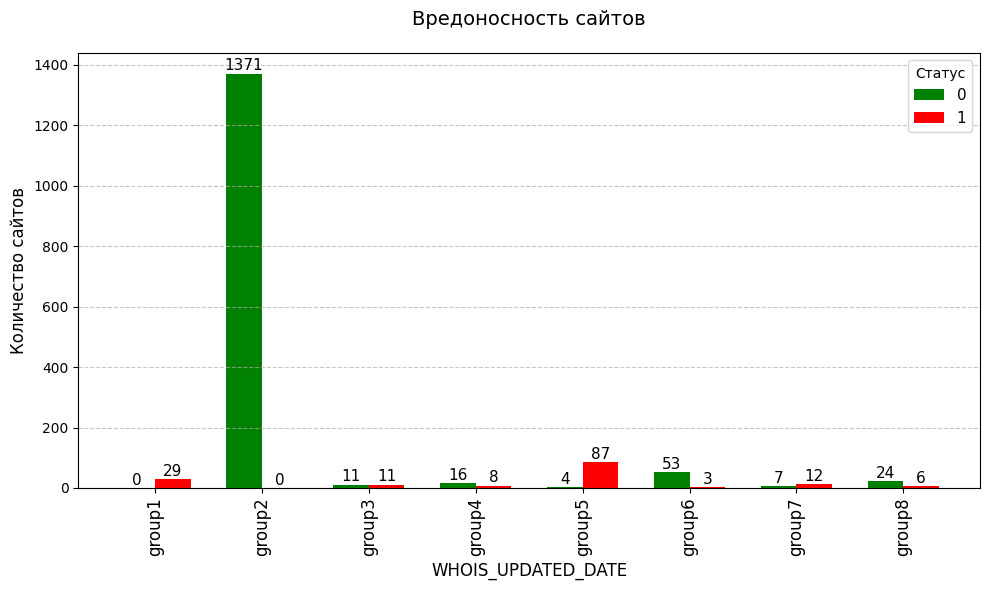

In [47]:
data['WHOIS_UPDATED_DATE'] = data['WHOIS_UPDATED_DATE'].replace(['13/02/2017 0:00', '18/09/2012 0:00', '30/05/2016 18:18', '4/07/2015 0:00', '6/09/2016 8:26', '4/01/2016 0:00', '16/02/2016 0:00', '5/04/2017 5:17', '5/05/2013 3:46', '8/12/2015 0:00', '30/05/2016 0:00', '12/01/2015 0:00', '27/12/2016 0:00', '9/02/2017 0:00', '20/03/2017 0:00', '18/07/2016 0:00', '18/11/2015 0:00', '2/01/2017 0:00', '14/10/2014 0:00', '24/02/2016 0:00', '11/09/2016 0:00', '18/06/2016 0:00', '9/08/2016 0:00'], 'group1')
data['WHOIS_UPDATED_DATE'] = data['WHOIS_UPDATED_DATE'].replace(['10/07/2012 0:00', '20/11/2013 0:00', '26/07/2016 0:00', '28/03/2017 0:00', '14/09/2015 0:00', '10/11/2016 0:00', '8/02/2017 0:00', '12/10/2015 0:00', '2/05/2014 0:00', '6/12/2015 17:05', '14/12/2015 0:00', '11/02/2017 0:00', '18/01/2017 0:00', '6/08/2016 0:00', '2/07/2014 0:00', '18/07/2014 0:00', '25/02/2015 0:00', '29/06/2016 0:00', '7/07/2016 0:00', '3/06/2016 0:00', '11/12/2015 0:00', '22/03/2017 3:37', '15/04/2015 0:00', '7/12/2015 0:00', '1/02/2017 0:00', '18/12/2016 0:00', '5/12/2013 0:00', '27/02/2017 0:00', '22/08/2016 0:00', '30/03/2014 0:00', '19/04/2015 0:00', '27/04/2015 0:00', '23/07/2011 0:00', '20/12/2013 0:00', '30/12/2016 0:00', '20/04/2015 0:00', '24/05/2016 0:00', '31/08/2016 0:00', '27/03/2017 0:00', '11/10/2016 0:00', '21/04/2017 16:47', '12/12/2015 10:16', '21/09/2016 15:14', '19/12/2015 0:00', '29/07/2015 0:00', '15/01/2015 0:00', '29/11/2014 0:00', '22/06/2016 0:00', '2/05/2016 0:00', '14/03/2017 0:00', '29/06/2015 0:00', '11/12/2016 0:00', '30/04/2015 0:00', '20/05/2016 0:00', '30/04/2013 0:00', '19/05/2016 0:00', '3/04/2016 11:08', '7/08/2015 0:00', '21/02/2017 0:00', '13/12/2016 0:00', '2/04/2017 0:00', '3/01/2016 0:00', '19/11/2012 0:00', '21/04/2017 0:00', '15/09/2016 21:37', '13/02/2013 1:33', '2/04/2014 0:00', '28/12/2016 0:00', '18/05/2016 0:00', '4/08/2015 0:00', '9/04/2017 0:00', '19/12/2016 8:39', '14/01/2012 0:00', '18/10/2014 0:00', '16/10/2014 0:00', '27/05/2016 14:46', '1/01/2017 0:00', '11/04/2017 0:00', '23/06/2016 0:00', '12/05/2016 0:00', '22/12/2015 0:00', '12/12/2016 0:00', '23/02/2017 17:46', '5/09/2014 0:00', '8/09/2016 0:00', '15/07/2015 0:00', '9/05/2016 0:00', '24/08/2016 0:00', '25/07/2016 0:00', '29/07/2013 0:00', '11/08/2015 20:35', '8/11/2014 0:00', '20/07/2016 0:00', '24/08/2015 0:00', '17/04/2015 0:00', '15/12/2015 0:00', '11/05/2016 14:19', '28/06/2016 0:00', '30/06/2016 0:00', '23/12/2016 4:58', '22/07/2016 0:00', '11/07/2016 9:21', '16/02/2015 0:00', '31/01/2013 0:00', '21/02/2017 3:57', '19/08/2015 0:00', '20/09/2016 13:11', '7/10/2016 0:00', '18/04/2017 1:29', '29/01/2017 0:00', '12/07/2016 0:00', '9/12/2016 0:00', '19/04/2017 12:59', '27/05/2016 0:00', '17/03/2016 4:34', '7/03/2013 19:26', '24/05/2012 0:00', '2/02/2017 17:11', '10/01/2017 0:00', '18/11/2016 0:00', '21/04/2015 0:00', '22/09/2016 0:00', '23/04/2015 0:00', '23/03/2017 0:00', '27/10/2016 0:00', '31/01/2016 0:00', '24/01/2017 0:00', '10/02/2016 0:00', '18/04/2017 17:38', '1/02/2017 5:28', '9/12/2015 0:00', '17/05/2016 0:00', '3/08/2014 0:00', '26/11/2015 0:00', '18/10/2015 0:00', '11/11/2016 0:00', '24/07/2014 0:00', '2/07/2015 0:00', '10/09/2016 13:29', '7/02/2017 0:00', '18/12/2014 0:00', '25/02/2017 14:18', '13/06/2016 0:00', '7/04/2016 0:00', '31/05/2016 17:46', '12/09/2013 0:45', '12/08/2015 0:00', '26/11/2014 0:00', '10/06/2016 13:57', '11/04/2017 23:16', '8/12/2014 0:00', '18/03/2017 0:00', '6/11/2016 0:00', '17/05/2013 0:00', '5/08/2013 0:00', '23/08/2016 10:07', '20/04/2016 0:00', '4/03/2017 0:00', '7/03/2013 0:00', '26/09/2016 0:00', '28/08/2015 0:00', '8/06/2015 0:00', '27/01/2016 0:00', '25/10/2016 0:00', '5/01/2016 0:00', '1/11/2016 0:00', '18/09/2015 0:00', '10/09/2016 0:00', '24/06/2016 0:00', '24/03/2017 0:00', '30/09/2009 2:59', '26/12/2012 0:00', '6/05/2015 0:00', '14/11/2016 0:00', '7/11/2014 0:00', '7/08/2013 22:19', '25/08/2015 0:00', '22/04/2015 0:00', '2/11/2016 0:00', '6/12/2016 21:52', '13/07/2016 0:00', '18/08/2016 0:00', '6/10/2015 0:00', '16/06/2014 0:00', '24/10/2016 0:00', '14/05/2015 0:00', '14/12/2016 0:00', '16/08/2016 0:00', '4/12/2014 17:41', '28/03/2017 18:24', '5/11/2016 0:00', '14/10/2012 0:00', '30/01/2017 0:00', '5/06/2014 0:00', '19/04/2017 0:00', '1/10/2016 0:00', '4/11/2016 0:00', '10/07/2015 0:00', '12/03/2017 1:47', '17/03/2016 0:00', '18/08/2015 0:00', '16/12/2016 0:00', '27/03/2014 0:00', '27/09/2012 0:00', '13/03/2014 0:00', '9/09/2013 0:00', '11/03/2012 0:00', '4/04/2014 0:00', '8/12/2016 14:01', '1/09/2012 0:00', '30/09/2015 0:00', '6/01/2016 0:00', '7/12/2016 0:00', '11/03/2017 15:28', '9/11/2016 0:00', '23/10/2013 0:00', '23/11/2015 0:00', '29/07/2016 0:00', '21/05/2015 0:00', '16/01/2017 0:00', '16/05/2016 0:00', '31/01/2017 0:00', '29/02/2016 0:00', '5/05/2016 0:00', '12/05/2015 0:00', '4/09/2013 0:00', '24/09/2016 0:00', '27/12/2015 0:00', '20/02/2017 0:00', '28/05/2014 0:00', '18/04/2016 0:00', '9/09/2016 0:00', '9/09/2015 0:00', '28/01/2017 0:00', '17/08/2016 0:00', '22/01/2017 0:00', '15/04/2016 0:00', '27/07/2016 0:00', '15/02/2016 0:00', '5/07/2016 0:00', '28/02/2017 10:46', '18/01/2016 0:00', '15/10/2016 0:00', '26/10/2016 0:00', '7/01/2015 0:00', '30/09/2016 9:12', '27/09/2016 0:00', '29/05/2015 0:00', '14/04/2017 0:00', '3/04/2017 0:00', '31/03/2017 0:00', '27/03/2014 15:06', '21/03/2015 0:00', '29/03/2013 0:00', '4/01/2017 0:00', '13/07/2014 0:00', '30/09/2016 0:00', '28/12/2014 0:00', '14/04/2016 0:00', '8/01/2016 0:00', '29/04/2017 0:00', '17/08/2013 0:00', '26/02/2017 0:00', '8/12/2016 0:00', '14/01/2016 0:00', '14/04/2014 0:00', '4/06/2015 0:00', '4/07/2016 14:14', '2/02/2016 0:00', '8/08/2015 0:00', '14/04/2015 0:00', '23/02/2015 0:00', '21/10/2016 0:00', '15/09/2011 0:00', '18/01/2013 0:00', '4/09/2016 0:00', '20/08/2015 15:58', '18/11/2014 0:00', '4/03/2016 0:00', '24/02/2017 0:00', '15/10/2015 0:00', '2017-03-07T22:02:38.0Z', '2/06/2009 0:00', '18/11/2013 0:00', '12/06/2015 0:00', '3/10/2016 3:45', '22/03/2017 18:00', '27/05/2015 0:00', '18/12/2015 0:00', '19/12/2016 0:00', '29/12/2016 14:11', '23/04/2017 0:00', '25/03/2017 0:00', '19/02/2016 0:00', '7/12/2015 11:23', '19/03/2016 0:00', '28/04/2015 0:00', '13/07/2016 17:36', '26/02/2014 23:35', '5/03/2016 0:00', '13/12/2008 0:00', '19/05/2016 10:14', '22/11/2016 0:00', '21/05/2014 0:00', '6/02/2017 0:00', '25/04/2017 0:00', '21/04/2016 0:00', '31/05/2013 23:28', '27/01/2017 0:00', '29/03/2017 0:00', '11/01/2016 0:00', '19/04/2017 10:41', '7/04/2017 0:00', '29/08/2014 0:00', '21/11/2016 0:00', '21/10/2014 0:00', '5/11/2012 0:00', '24/04/2017 0:00', '31/10/2016 0:00', '8/03/2017 0:00', '8/04/2017 1:39', '5/01/2017 0:00', '28/10/2016 0:00', '19/03/2017 0:00', '16/09/2016 0:00', '28/02/2017 0:00', '30/08/2016 0:00', '15/11/2013 0:00', '24/04/2017 11:55', '9/12/2015 14:43', '23/11/2016 0:00', '18/04/2015 0:00', '30/10/2016 0:00', '14/07/2008 0:00', '10/08/2016 0:00', '15/05/2016 0:00', '18/02/2017 0:00', '16/07/2016 7:42', '8/01/2017 0:00', '13/08/2015 0:00', '1/06/2016 10:45', '29/04/2013 0:00', '1/03/2017 19:31', '3/01/2017 0:00', '21/05/2016 0:00', '23/01/2014 0:00', '1/11/2013 0:00', '9/11/2015 0:00', '5/04/2017 13:36', '17/03/2017 14:30', '13/11/2013 0:00', '6/03/2017 0:00', '11/10/2016 0:20', '20/10/2015 23:34', '12/01/2017 0:00', '30/11/2016 0:00', '3/03/2016 0:00', '28/03/2017 18:16', '1/02/2017 0:01', '3/10/2016 0:00', '23/02/2017 0:00', '21/09/2015 0:00', '5/11/2015 0:00', '27/10/2015 0:00', '19/09/2016 0:00', '16/03/2017 0:00', '31/12/2016 0:00', '9/04/2014 0:00', '11/03/2017 0:00', '5/10/2016 0:00', '14/02/2017 0:00', '2/04/2017 1:35', '13/05/2015 0:00', '2/07/2016 0:00', '22/04/2016 0:00', '29/03/2016 17:55', '8/10/2014 0:00', '30/04/2014 0:00', '31/05/2016 0:00', '13/02/2014 0:00', '16/04/2016 0:00', '9/06/2016 0:00', '19/04/2017 17:24', '15/07/2016 0:00', '2/10/2016 0:00', '11/04/2016 0:00', '28/03/2014 0:00', '3/11/2015 0:00', '17/10/2016 0:00', '22/02/2016 0:00', '14/01/2017 16:52', '4/02/2017 0:00', '1/03/2017 0:00', '21/06/2016 0:00', '23/09/2014 14:02', '26/04/2016 9:14', '31/03/2016 0:00', '24/04/2015 0:00', '29/08/2016 20:58', '22/03/2016 0:00', '20/04/2017 0:00', '5/05/2015 0:00', '4/04/2014 15:11', '25/11/2015 0:00', '3/05/2012 0:00', '17/04/2016 0:00', '22/02/2017 0:00', '11/08/2016 0:00', '28/09/2016 0:00', '24/07/2012 0:00', '19/10/2016 0:00', '5/08/2016 0:00', '22/12/2016 0:00', '26/09/2013 0:00', '1/05/2014 0:00', '15/09/2014 7:40', '11/11/2012 0:00', '5/10/2015 0:00', '31/07/2016 0:00', '10/09/2012 0:00', '15/02/2017 0:00', '29/04/2016 0:00', '16/01/2015 0:00', '25/11/2016 0:00', '14/08/2013 0:00', '26/08/2015 0:00', '19/02/2017 0:00', '13/01/2017 0:00', '15/04/2017 0:00', '17/03/2017 0:00', '13/05/2016 0:00', '4/12/2013 0:00', '13/08/2016 0:00', '12/11/2015 0:00', '17/02/2016 0:00', '12/02/2016 0:00', '8/04/2017 0:00', '26/06/2014 0:00', '16/01/2016 0:00', '13/03/2017 0:00', '20/01/2017 1:26', '3/04/2016 0:00', '18/10/2016 0:00', '14/02/2017 20:27', '23/12/2011 0:00', '10/02/2017 0:00', '26/02/2016 0:00', '19/07/2016 0:00', '9/01/2017 10:11', '13/04/2016 0:00', '30/11/2016 10:30', '1/02/2013 0:00', '4/07/2016 0:00', '26/04/2015 0:00', '5/09/2016 8:00', '14/08/2016 0:00', '30/08/2013 0:00', '1/06/2016 0:00', '12/08/2016 0:00', '9/10/2015 0:00', '27/01/2017 0:20', '2/02/2017 0:00', '13/11/2016 0:00', '29/11/2016 0:00', '4/10/2016 0:00', '18/10/2013 0:00', '21/07/2016 0:00', '20/06/2012 0:00', '4/05/2016 0:00', '20/07/2014 0:00', '25/12/2016 0:00', '2/12/2016 0:00', '21/06/2016 17:27', '5/04/2017 0:00', '30/03/2017 0:00', '15/09/2015 0:00', '24/02/2015 0:00', '7/05/2016 0:00', '26/04/2017 0:00', '7/11/2016 0:00', '29/08/2016 0:00', '2/06/2016 0:00', '10/07/2013 0:00', '1/09/2016 14:20', '5/03/2017 0:00', '9/01/2017 16:53', '1/11/2012 0:00', '14/01/2017 0:00', '2/03/2017 0:00', '12/03/2017 0:00', '19/05/2016 15:04', '11/11/2014 0:00', '1/07/2016 0:00', '6/01/2017 0:00', '12/03/2017 9:17', '25/04/2016 0:00', '10/02/2015 0:00', '9/07/2016 0:00', '6/04/2016 0:00', '5/03/2013 0:00', '17/12/2012 21:45', '2/04/2016 0:00', '20/08/2015 0:00', '20/07/2011 0:00', '28/10/2015 0:00', '17/01/2016 0:00', '3/11/2016 0:00', '16/03/2015 0:00', '2/07/2015 17:44', '10/09/2016 6:58', '3/03/2015 0:00', '9/03/2015 0:00', '26/01/2017 0:00', '14/02/2016 0:00', '20/11/2015 0:00', '20/09/2013 15:03', '8/08/2016 0:00', '28/04/2016 0:00', '27/11/2015 0:00', '26/04/2016 0:00', '14/10/2016 0:00', '26/08/2016 0:00', '17/12/2016 0:00', '9/09/2015 20:47', '28/10/2013 10:54', '28/03/2016 0:00', '21/01/2016 0:00', '5/09/2016 3:47', '17/01/2017 0:00', '13/09/2016 0:00', '10/12/2016 0:00', '17/06/2016 0:00', '26/03/2017 0:00', '6/07/2015 0:00', '26/06/2016 0:00', '28/01/2015 0:00', '23/01/2017 0:00', '21/07/2016 18:54', '16/01/2017 17:49', '21/03/2017 0:00', '22/05/2015 0:00'], 'group2')
data['WHOIS_UPDATED_DATE'] = data['WHOIS_UPDATED_DATE'].replace(['15/11/2016 0:00', '23/05/2016 0:00', '25/02/2017 0:00', '29/09/2016 0:00', '4/08/2016 0:00', '6/05/2016 0:00', '6/07/2016 0:00', '9/03/2017 0:00', '27/04/2017 0:00'], 'group3')
data['WHOIS_UPDATED_DATE'] = data['WHOIS_UPDATED_DATE'].replace(['1/12/2016 0:00', '10/05/2016 0:00', '10/10/2016 0:00', '18/04/2017 0:00', '20/10/2016 0:00', '7/09/2016 0:00', '4/04/2017 0:00'], 'group4')
data['WHOIS_UPDATED_DATE'] = data['WHOIS_UPDATED_DATE'].replace(['14/06/2016 0:00', '25/05/2016 0:00', '2/09/2016 0:00'], 'group5')
data['WHOIS_UPDATED_DATE'] = data['WHOIS_UPDATED_DATE'].replace(['22/03/2017 0:00', '22/10/2016 0:00', '3/03/2017 0:00'], 'group6')
data['WHOIS_UPDATED_DATE'] = data['WHOIS_UPDATED_DATE'].replace(['28/04/2017 0:00', '7/03/2017 0:00'], 'group7')
data['WHOIS_UPDATED_DATE'] = data['WHOIS_UPDATED_DATE'].replace(['8/11/2016 0:00', '6/10/2016 0:00', '10/04/2017 0:00', '15/03/2017 0:00', '16/11/2016 0:00'], 'group8')

cat(data, 'WHOIS_UPDATED_DATE')

In [3]:
def number(df, safe, no_safe, column):
    plt.figure(figsize=(30, 6))
    sns.countplot(data=safe, x=column, color='green', alpha=0.5, label="Защищенный")
    sns.countplot(data=no_safe, x=column, color='red', alpha=0.5, label="Вредоносный")
    plt.xlabel(f"Характеристика {column} сайтов")
    plt.ylabel("Количество")
    plt.title(f"Сравнение распределения {column} защищенных и вредоносных сайтов")
    plt.legend()
    plt.show()

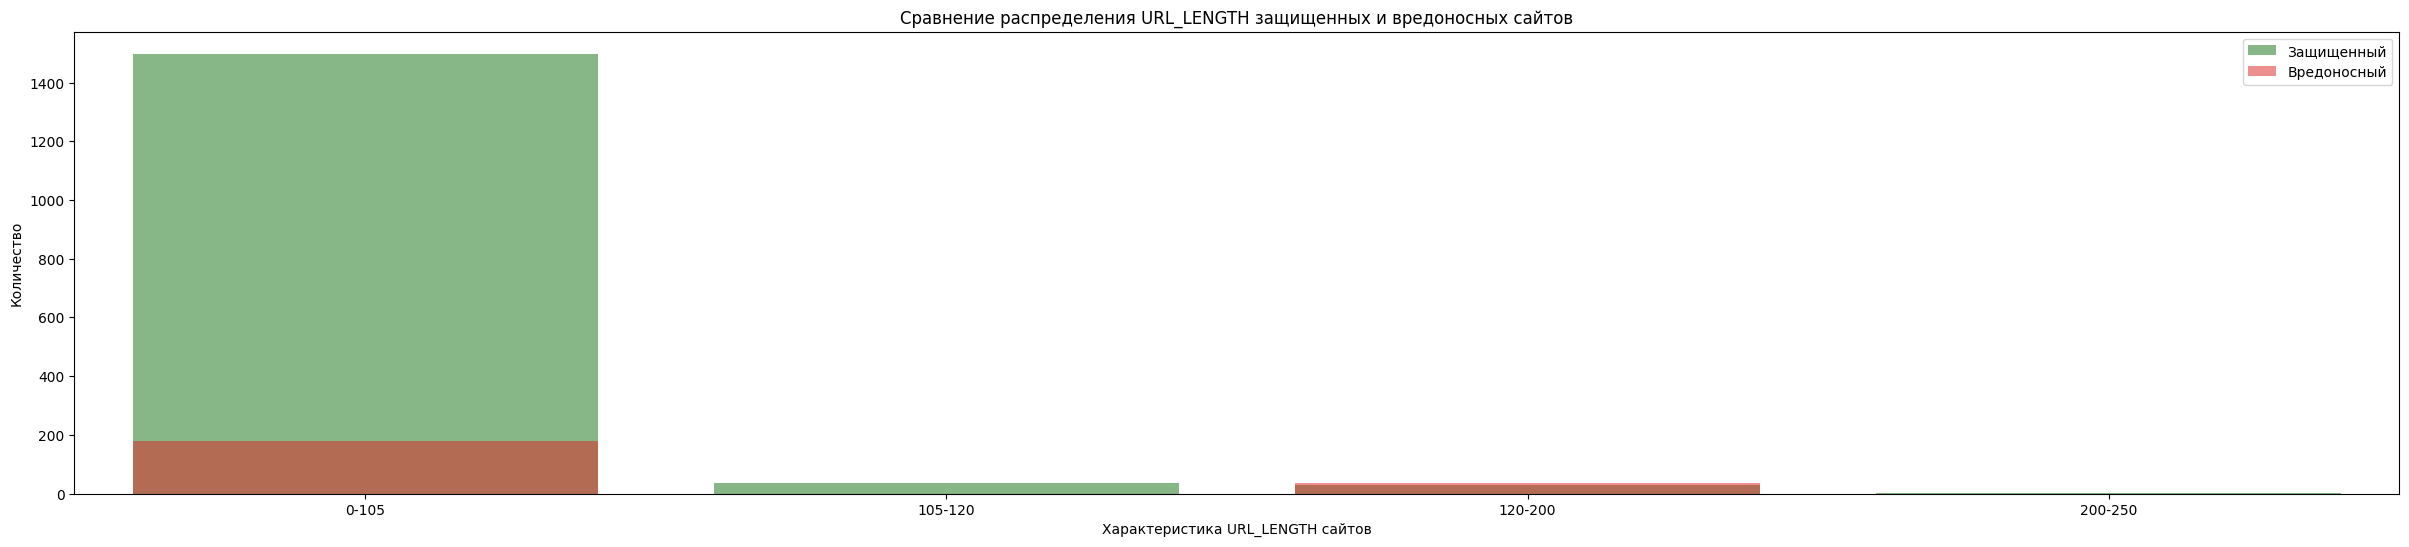

In [ ]:
data['URL_LENGTH'] = pd.cut(data['URL_LENGTH'], bins=[0, 105, 120, 200, 250], labels=['0-105', '105-120', '120-200', '200-250'])

safe_sited = data[data['Type'] == 0]
no_safe_sites = data[data['Type'] == 1]

number(data, safe_sited, no_safe_sites, 'URL_LENGTH')

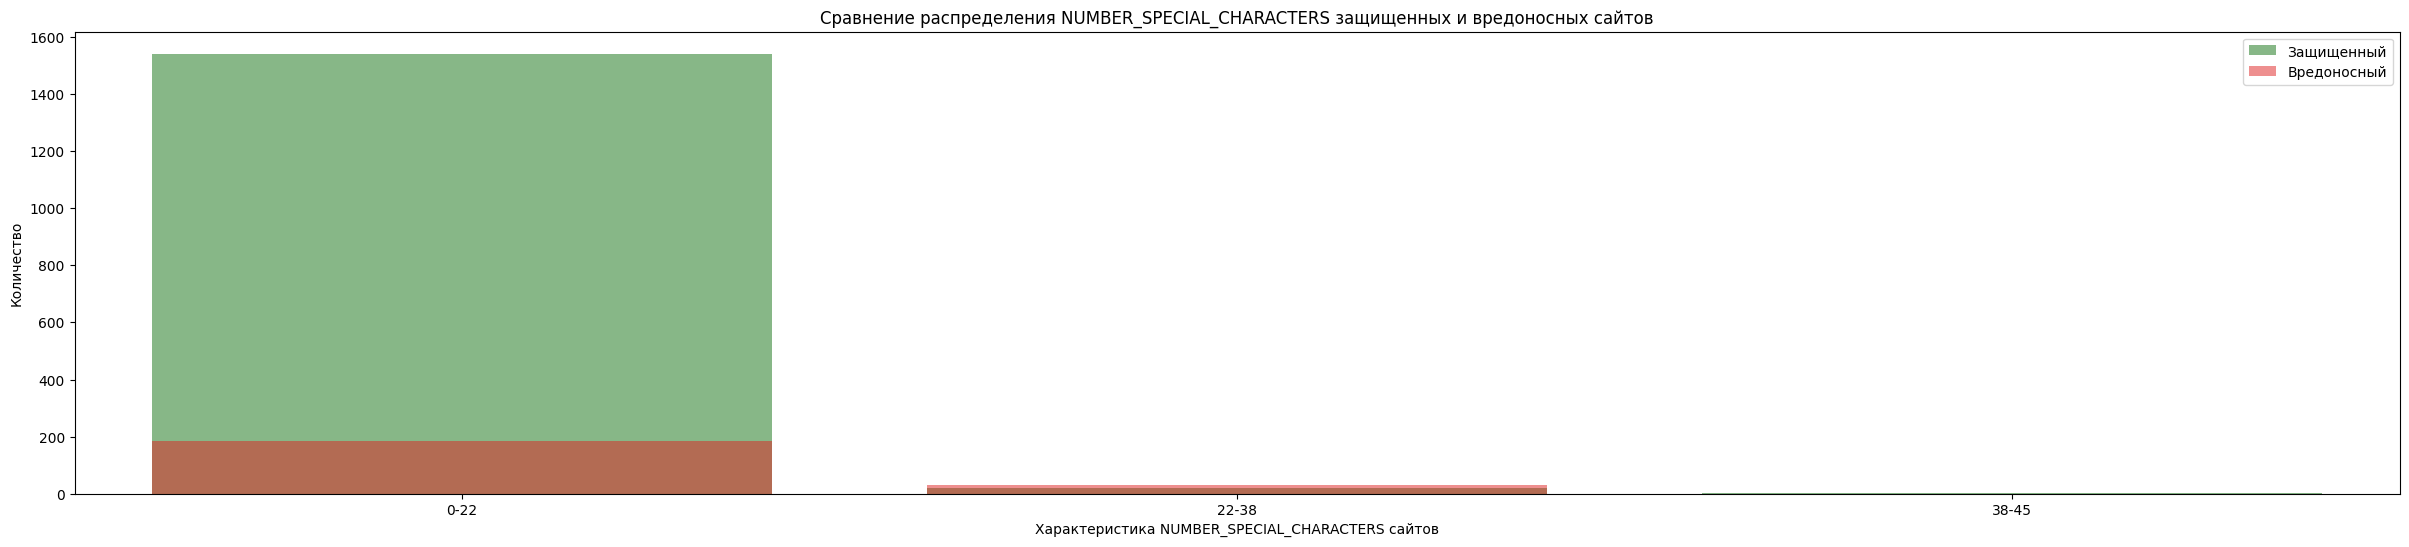

In [ ]:
data['NUMBER_SPECIAL_CHARACTERS'] = pd.cut(data['NUMBER_SPECIAL_CHARACTERS'], bins=[0, 22, 38, 45], labels=['0-22', '22-38', '38-45'])

safe_sited = data[data['Type'] == 0]
no_safe_sites = data[data['Type'] == 1]

number(data, safe_sited, no_safe_sites, 'NUMBER_SPECIAL_CHARACTERS')

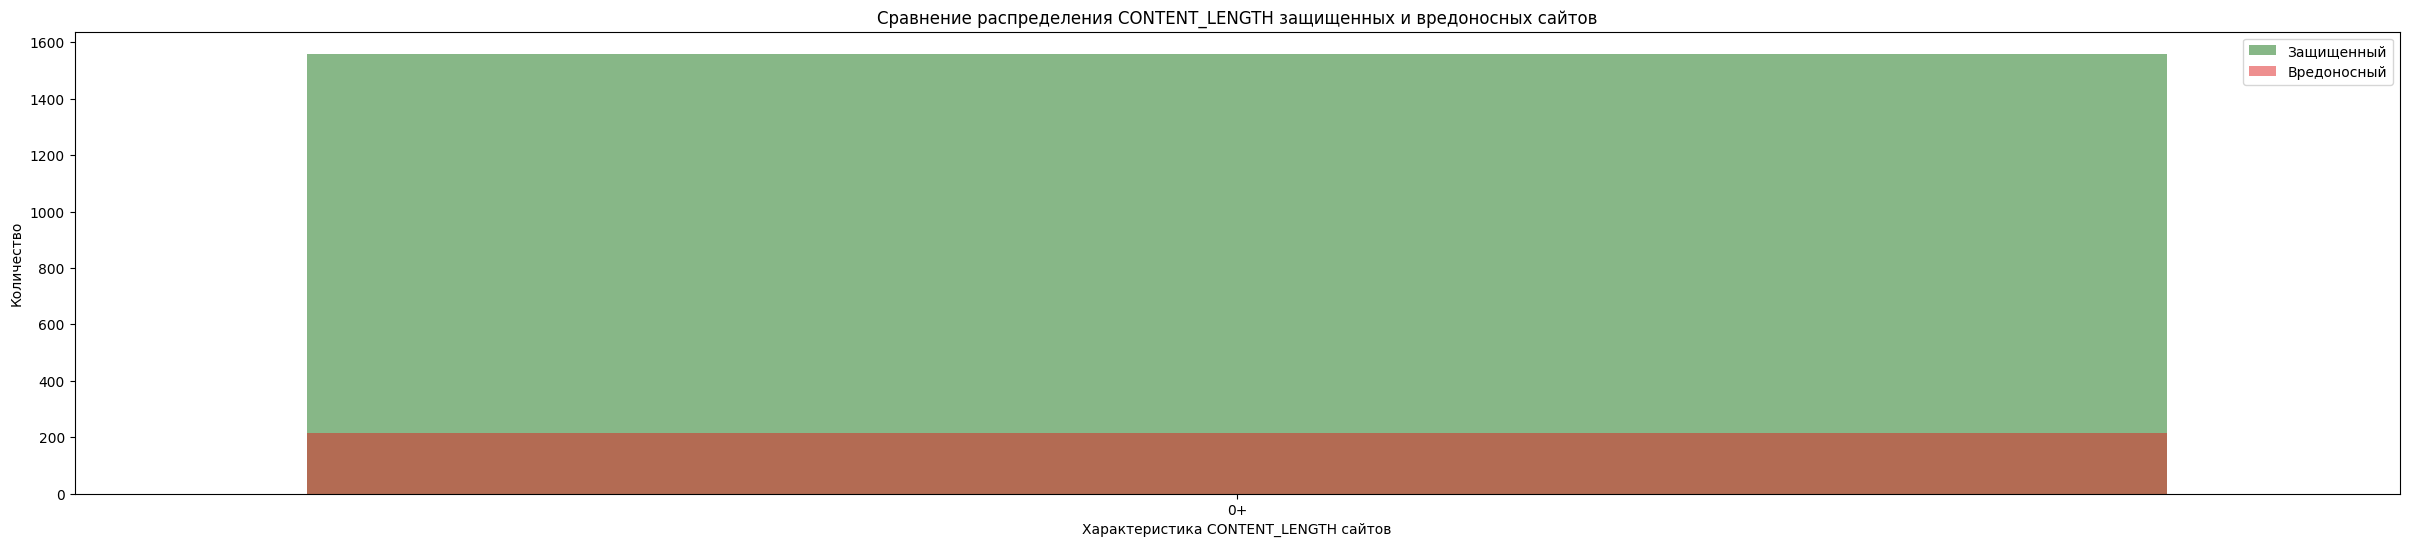

In [ ]:
data['CONTENT_LENGTH'] = data.CONTENT_LENGTH.fillna(data.CONTENT_LENGTH.median())

data['CONTENT_LENGTH'] = pd.cut(data['CONTENT_LENGTH'], bins=[0, 700000], labels=['0+'])

safe_sited = data[data['Type'] == 0]
no_safe_sites = data[data['Type'] == 1]

number(data, safe_sited, no_safe_sites, 'CONTENT_LENGTH')

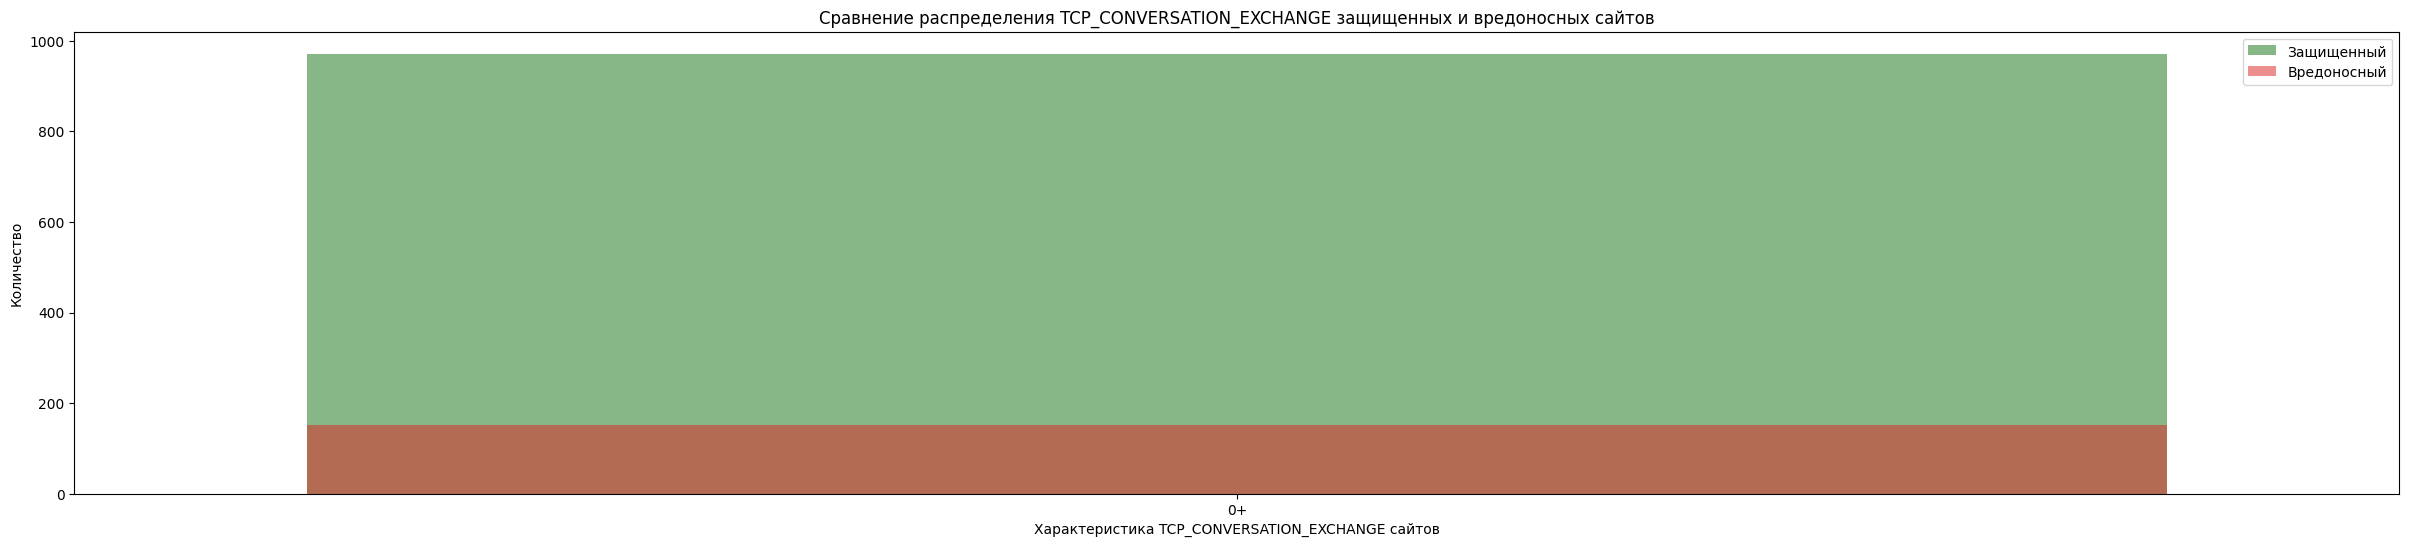

In [ ]:
data['TCP_CONVERSATION_EXCHANGE'] = data.TCP_CONVERSATION_EXCHANGE.fillna(data.TCP_CONVERSATION_EXCHANGE.median())

data['TCP_CONVERSATION_EXCHANGE'] = pd.cut(data['TCP_CONVERSATION_EXCHANGE'], bins=[0, 1200], labels=['0+'])

safe_sited = data[data['Type'] == 0]
no_safe_sites = data[data['Type'] == 1]

number(data, safe_sited, no_safe_sites, 'TCP_CONVERSATION_EXCHANGE')

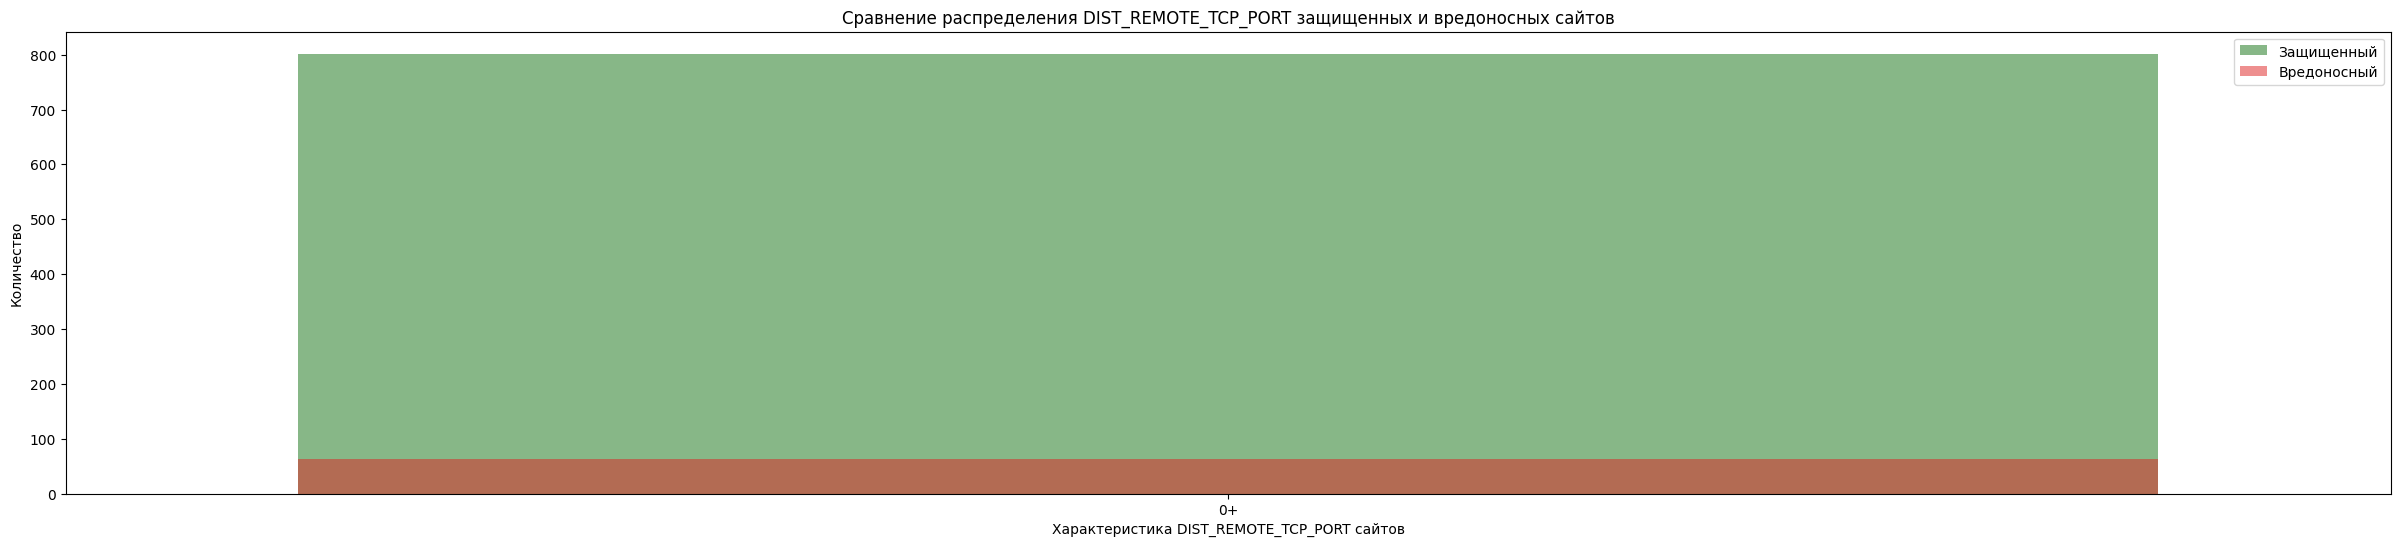

In [ ]:
data['DIST_REMOTE_TCP_PORT'] = data.DIST_REMOTE_TCP_PORT.fillna(data.DIST_REMOTE_TCP_PORT.median())

data['DIST_REMOTE_TCP_PORT'] = pd.cut(data['DIST_REMOTE_TCP_PORT'], bins=[0, 1200], labels=['0+'])

safe_sited = data[data['Type'] == 0]
no_safe_sites = data[data['Type'] == 1]

number(data, safe_sited, no_safe_sites, 'DIST_REMOTE_TCP_PORT')

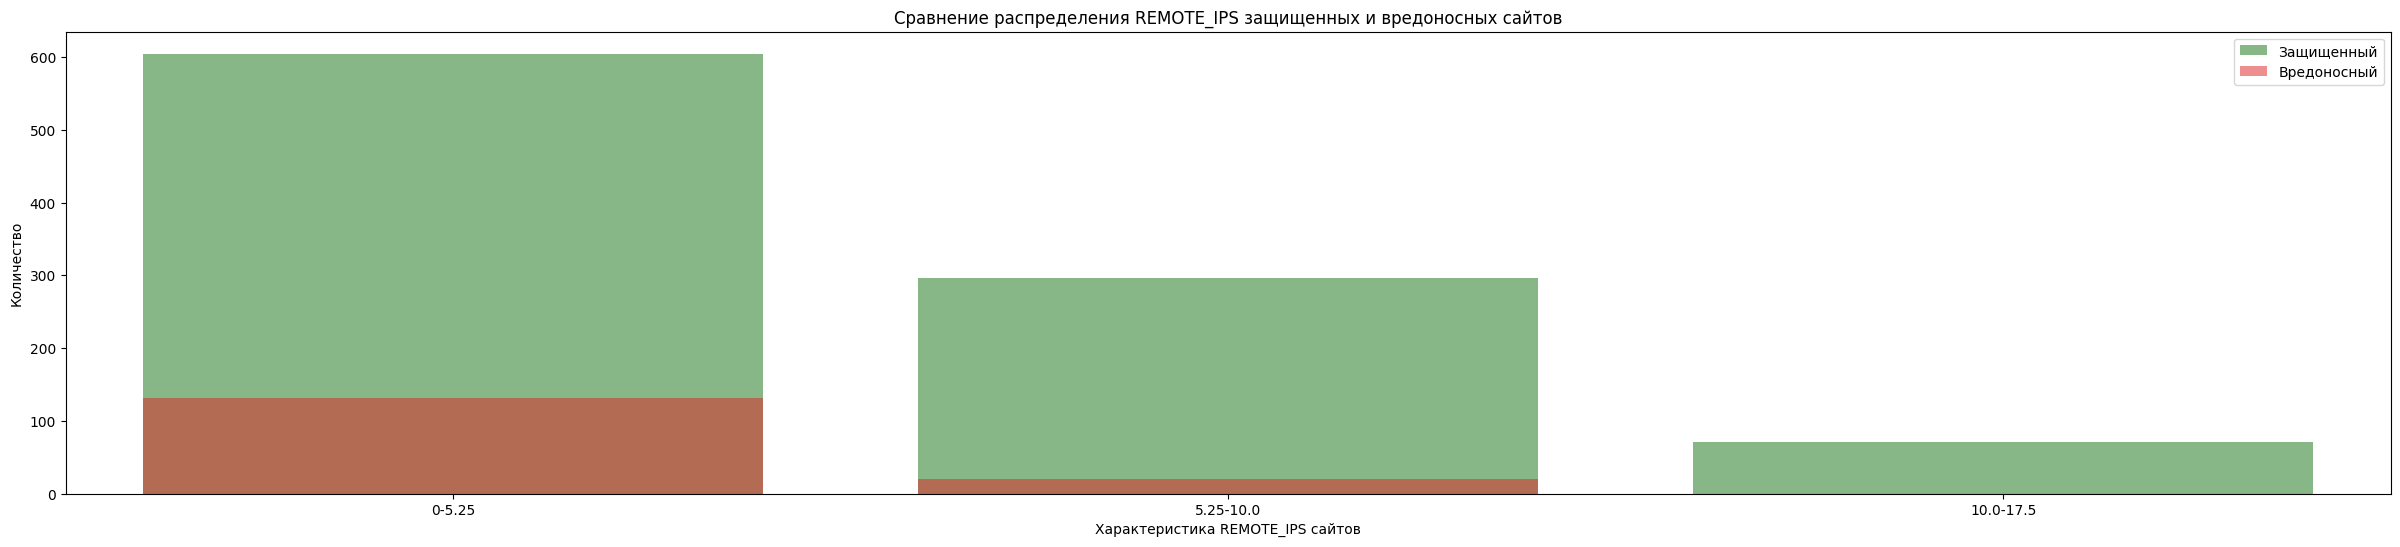

In [ ]:
data['REMOTE_IPS'] = pd.cut(data['REMOTE_IPS'], bins=[0.0, 5.25, 10.0, 17.5], labels=['0-5.25', '5.25-10.0', '10.0-17.5'])

safe_sited = data[data['Type'] == 0]
no_safe_sites = data[data['Type'] == 1]

number(data, safe_sited, no_safe_sites, 'REMOTE_IPS')

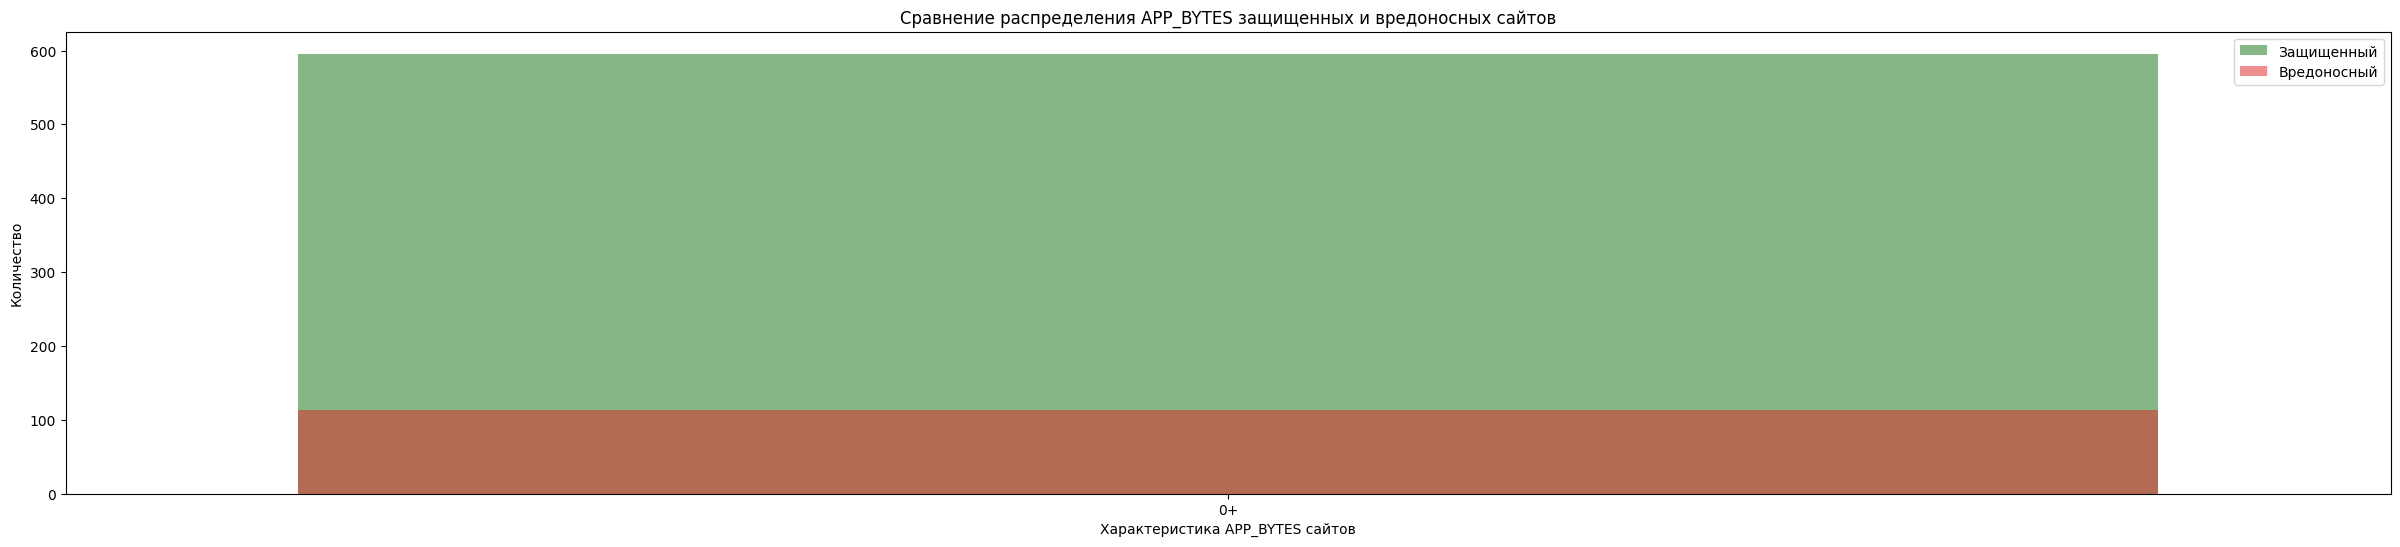

In [15]:
data['APP_BYTES'] = pd.cut(data['APP_BYTES'], bins=[0, 2500], labels=['0+'])

safe_sited = data[data['Type'] == 0]
no_safe_sites = data[data['Type'] == 1]

number(data, safe_sited, no_safe_sites, 'APP_BYTES')

In [14]:
print(data)

          URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0      M0_109          16                          7  iso-8859-1   
1      B0_827          53                          9    us-ascii   
2     B0_2314          16                          6       UTF-8   
3      B0_862          53                         10    us-ascii   
4      B0_911          16                          6    us-ascii   
...       ...         ...                        ...         ...   
1776  B0_2131          53                         10       UTF-8   
1777  B0_2268          53                          9       UTF-8   
1778   B0_294          53                          7  iso-8859-1   
1779   B0_472          53                         12  iso-8859-1   
1780   B0_556          53                         12  ISO-8859-1   

                                                 SERVER  CONTENT_LENGTH  \
0                                                 nginx           263.0   
1                                

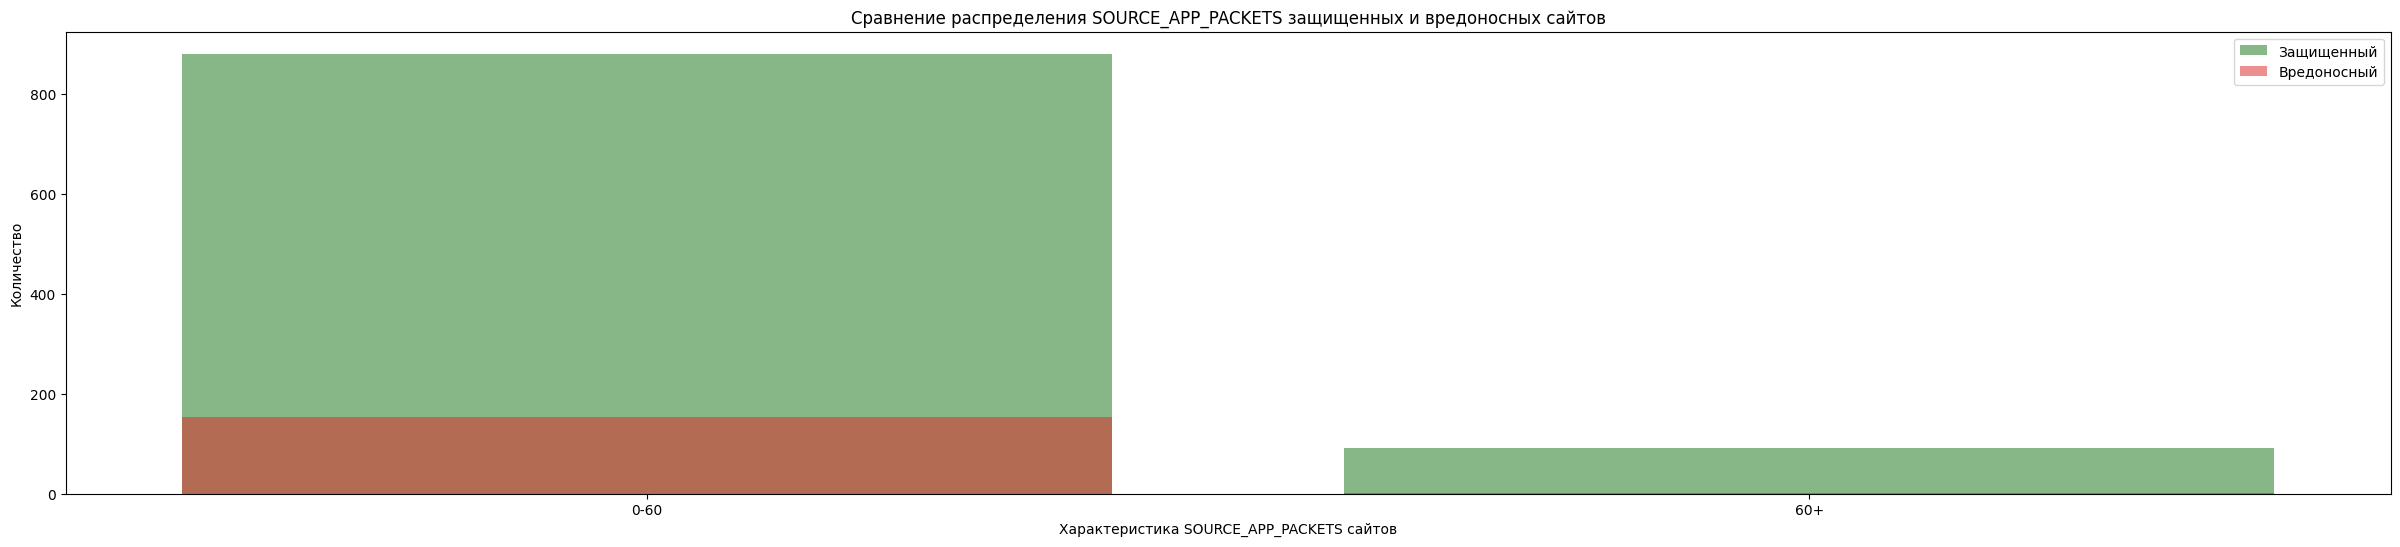

In [ ]:
data['SOURCE_APP_PACKETS'] = data.SOURCE_APP_PACKETS.fillna(data.SOURCE_APP_PACKETS.median())

data['SOURCE_APP_PACKETS'] = pd.cut(data['SOURCE_APP_PACKETS'], bins=[0, 60, 1300], labels=['0-60', '60+'])

safe_sited = data[data['Type'] == 0]
no_safe_sites = data[data['Type'] == 1]

number(data, safe_sited, no_safe_sites, 'SOURCE_APP_PACKETS')

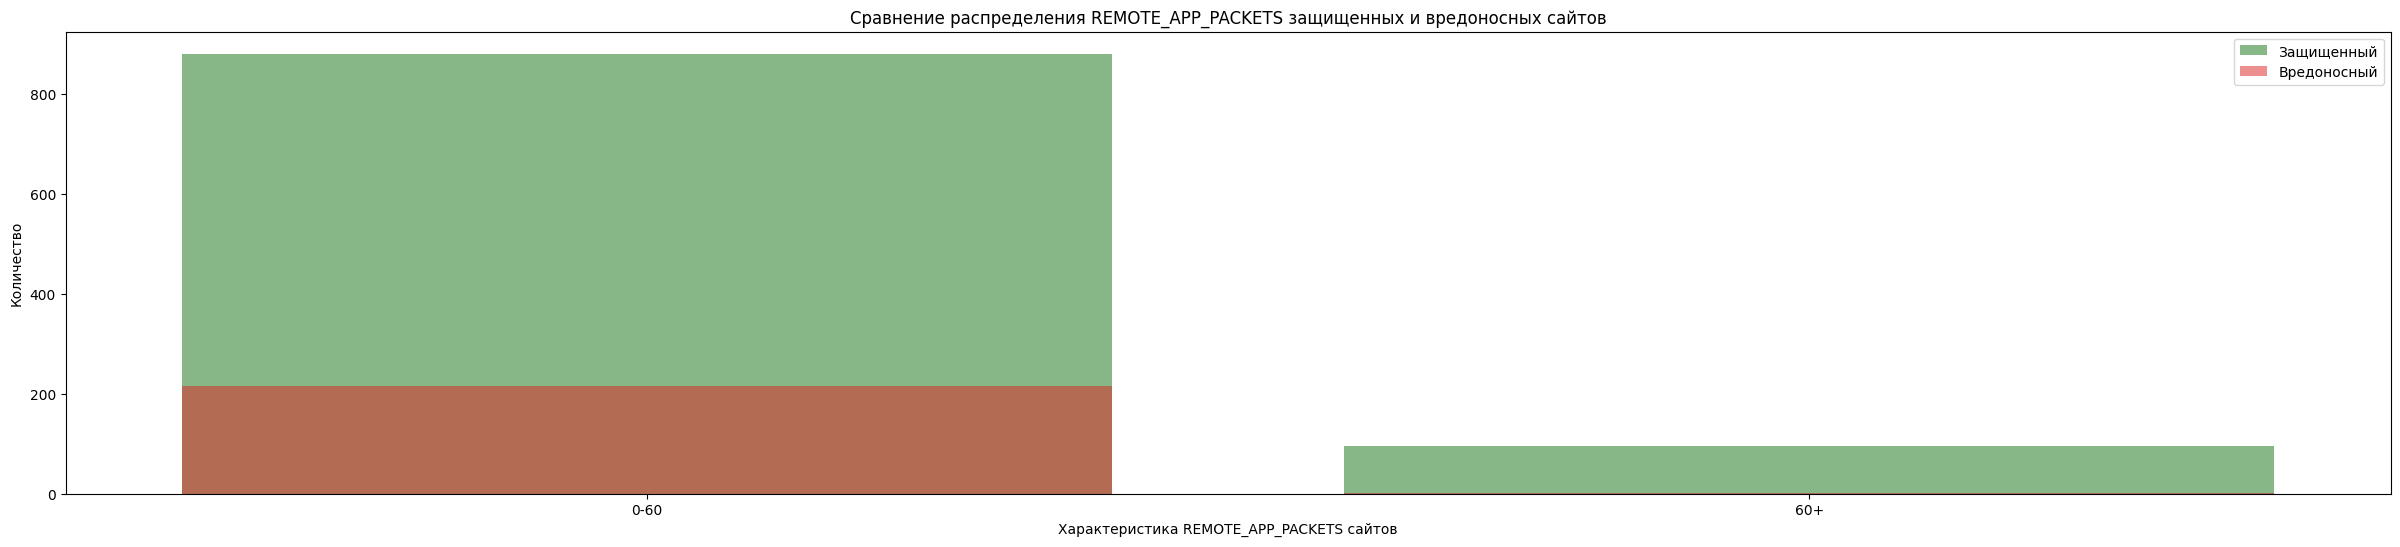

In [ ]:
data['REMOTE_APP_PACKETS'] = pd.cut(data['REMOTE_APP_PACKETS'], bins=[0, 60, 1300], labels=['0-60', '60+'])

safe_sited = data[data['Type'] == 0]
no_safe_sites = data[data['Type'] == 1]

number(data, safe_sited, no_safe_sites, 'REMOTE_APP_PACKETS')

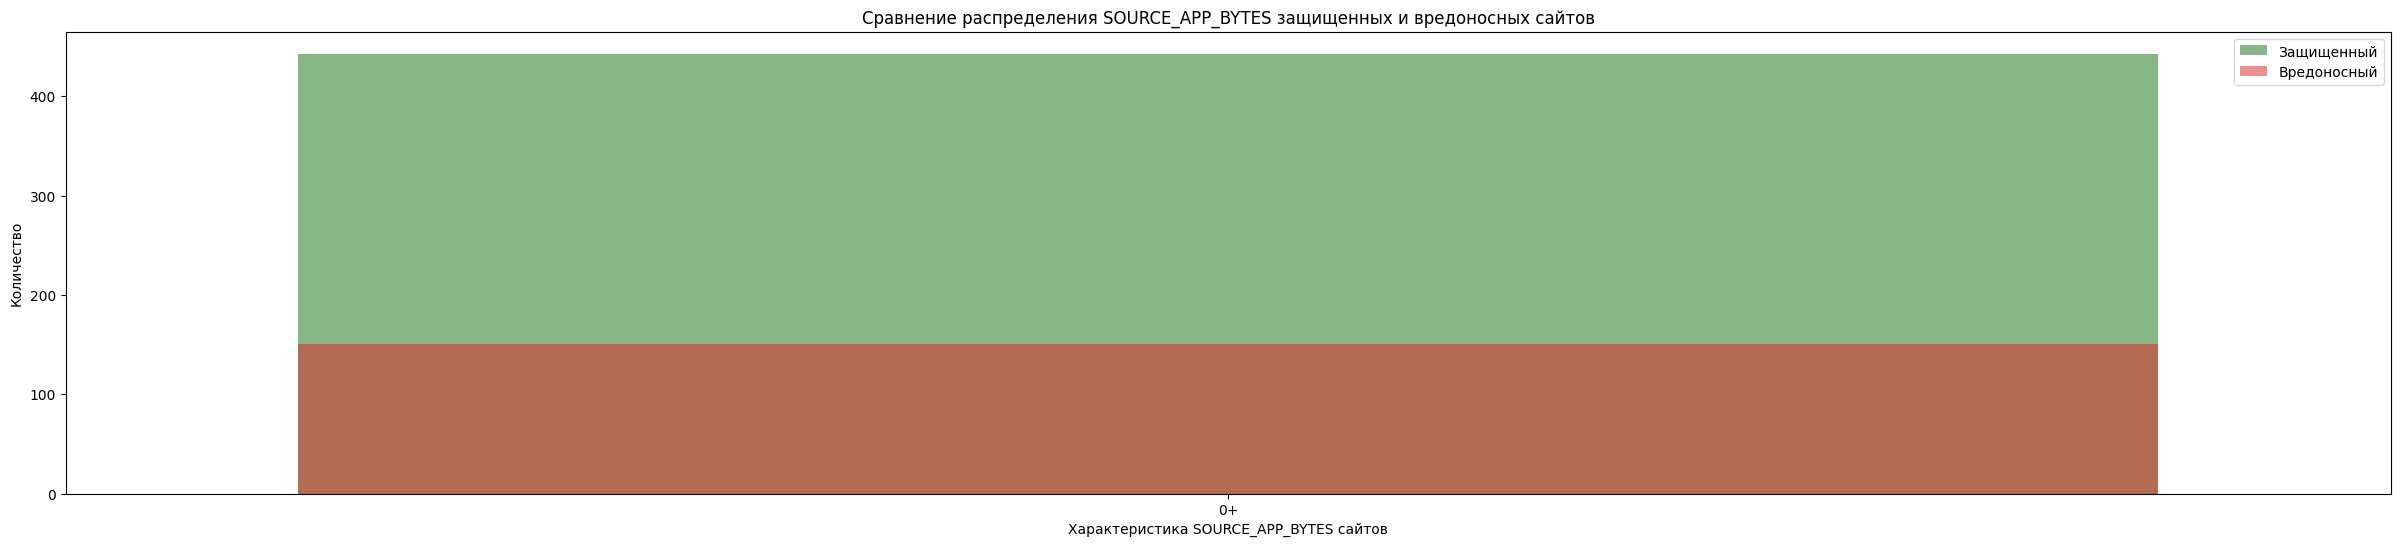

In [16]:
data['SOURCE_APP_BYTES'] = pd.cut(data['SOURCE_APP_BYTES'], bins=[0, 3000], labels=['0+'])

safe_sited = data[data['Type'] == 0]
no_safe_sites = data[data['Type'] == 1]

number(data, safe_sited, no_safe_sites, 'SOURCE_APP_BYTES')

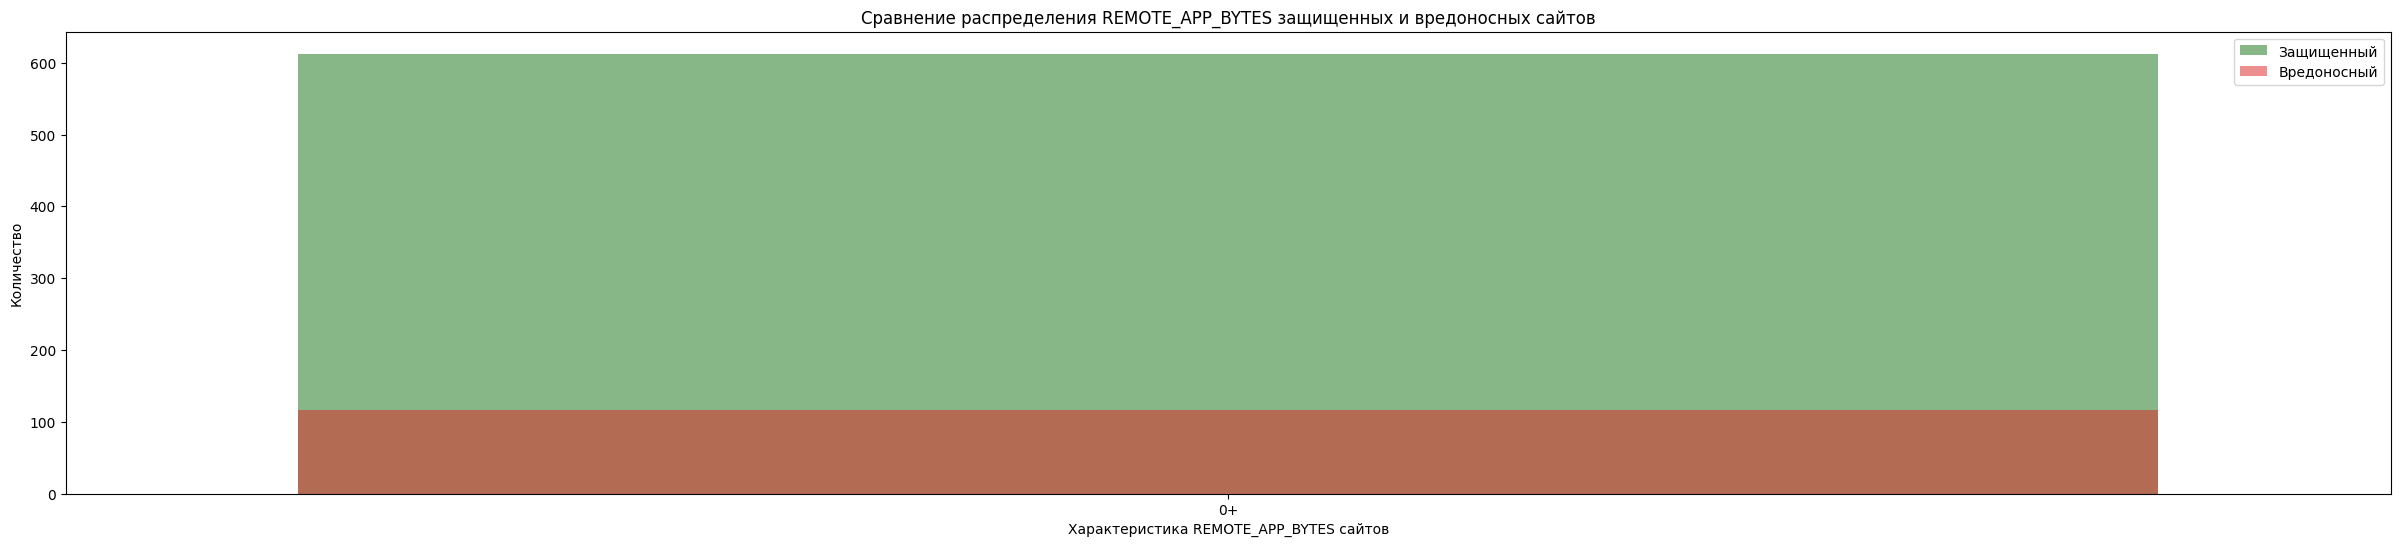

In [17]:
data['REMOTE_APP_BYTES'] = pd.cut(data['REMOTE_APP_BYTES'], bins=[0, 3000], labels=['0+'])

safe_sited = data[data['Type'] == 0]
no_safe_sites = data[data['Type'] == 1]

number(data, safe_sited, no_safe_sites, 'REMOTE_APP_BYTES')

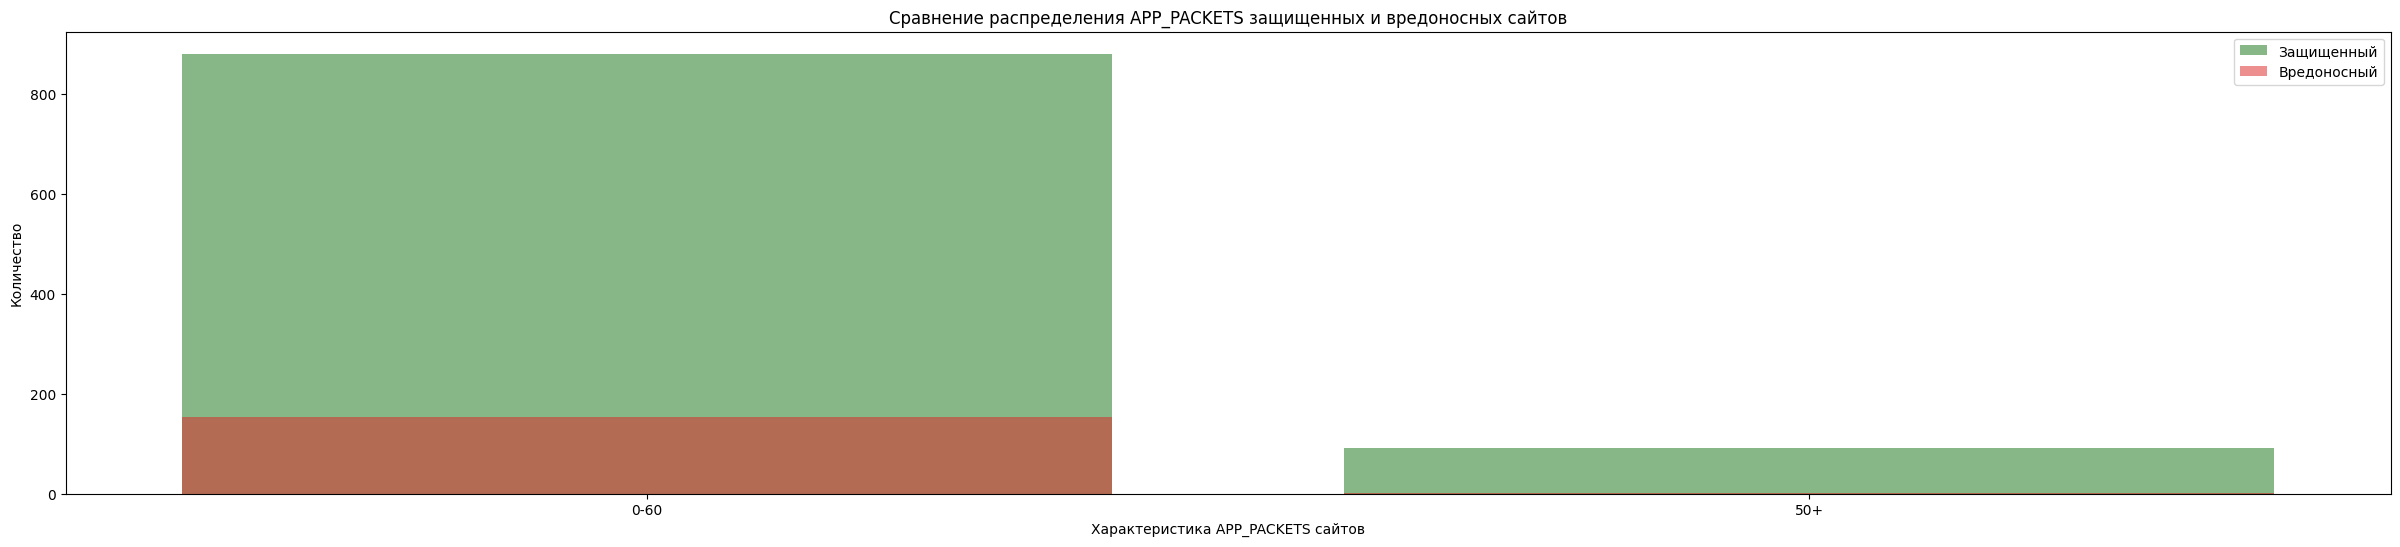

In [ ]:
data['APP_PACKETS'] = data.APP_PACKETS.fillna(data.APP_PACKETS.median())

data['APP_PACKETS'] = pd.cut(data['APP_PACKETS'], bins=[0, 60, 1300], labels=['0-60', '50+'])

safe_sited = data[data['Type'] == 0]
no_safe_sites = data[data['Type'] == 1]

number(data, safe_sited, no_safe_sites, 'APP_PACKETS')

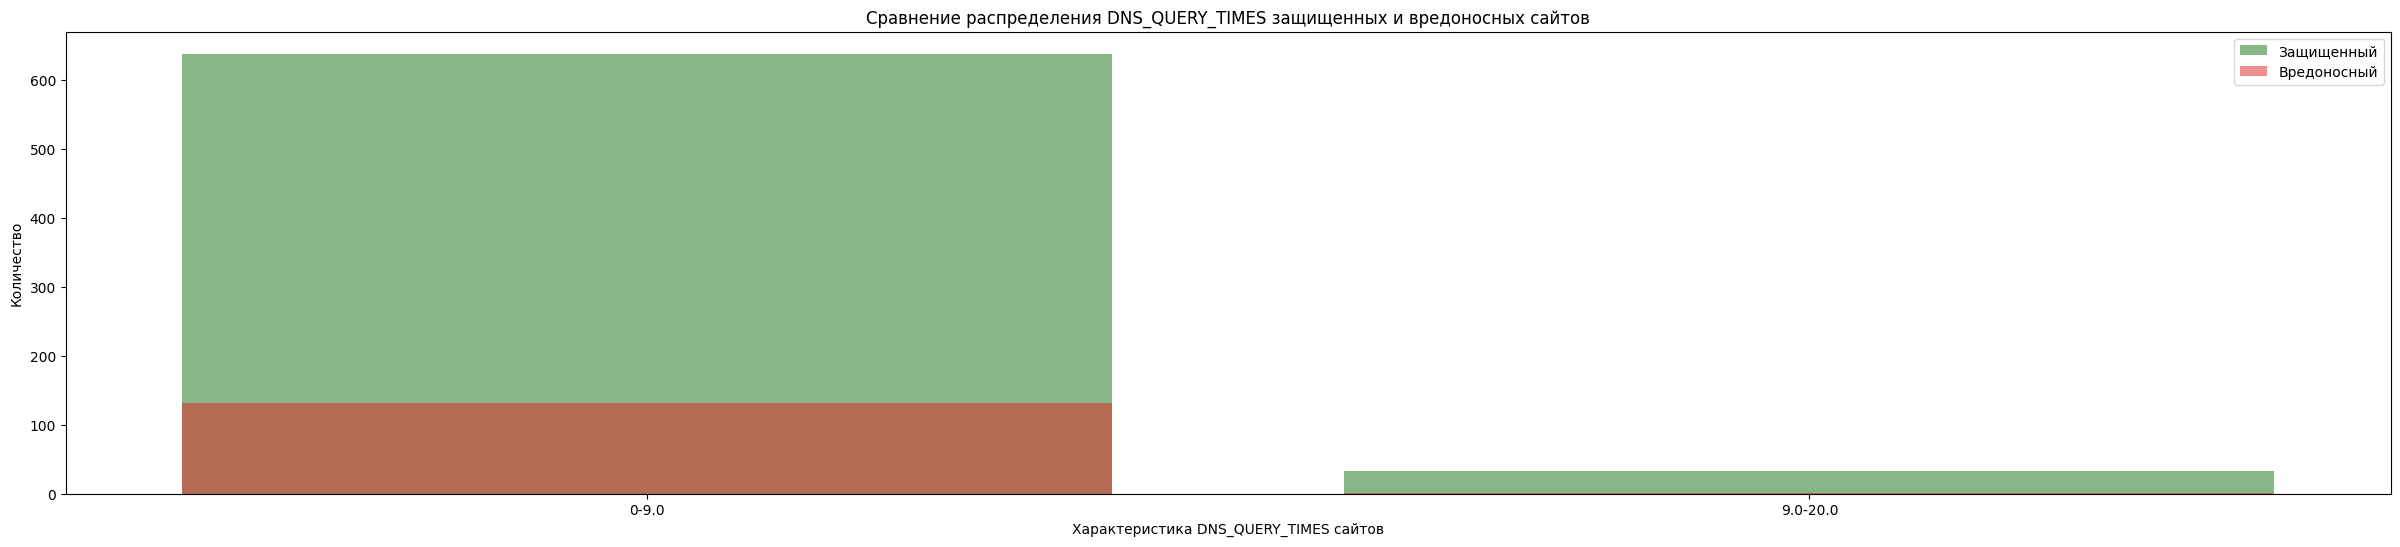

In [ ]:
data['DNS_QUERY_TIMES'] = data.DNS_QUERY_TIMES.fillna(data.DNS_QUERY_TIMES.median())

data['DNS_QUERY_TIMES'] = pd.cut(data['DNS_QUERY_TIMES'], bins=[0.0, 9.0, 20.0], labels=['0-9.0', '9.0-20.0'])

safe_sited = data[data['Type'] == 0]
no_safe_sites = data[data['Type'] == 1]

number(data, safe_sited, no_safe_sites, 'DNS_QUERY_TIMES')